In [ ]:
import pandas as pd
pd.set_option('display.max_columns',50)
import pandas_profiling as pp
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, CategoricalNB
import sklearn.metrics as sklm
from sklearn.metrics import roc_curve, auc
import numpy as np
import numpy.random as nr
import math
import os
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Xử lí dữ liệu

In [ ]:
COLUMNS=['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
         'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
         'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
         'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
         'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
         'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
         'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
         'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']
CONTINUOS_COLUMNS=['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
                   'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
                   'count', 'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_count', 'srv_serror_rate', 'srv_rerror_rate', 'srv_diff_host_rate']
CATEGORICAL_COLUMNS=['protocol_type', 'service', 'flag']
NUMERIC_COLUMNS=['duration', 'src_bytes', 'dst_bytes', 'land',
         'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
         'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
         'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
         'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
         'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
         'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
         'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
DATA_PATH='data/kddcup.data'

In [ ]:
# data prepairing
df=pd.read_csv(DATA_PATH, names=COLUMNS)
print(df.shape)
df.sample(20)

(4898431, 42)


duration protocol_type  service flag  src_bytes  dst_bytes  land  \
518092          0           tcp  private   S0          0          0     0   
1218065         0           tcp  private   S0          0          0     0   
2490689         0          icmp    ecr_i   SF       1032          0     0   
865360          0           tcp     http   SF        200        354     0   
3744175         0           tcp  private   S0          0          0     0   
2239647         0          icmp    ecr_i   SF       1032          0     0   
860545          0           tcp     http   SF        323        434     0   
2872168         0          icmp    ecr_i   SF       1032          0     0   
1863975         0          icmp    ecr_i   SF       1032          0     0   
1628920         0          icmp    ecr_i   SF       1032          0     0   
4113020         0          icmp    ecr_i   SF        520          0     0   
52229           0           tcp     http   SF        227        318     0   
945793          0          icmp    ecr_i   SF       1032          0     0   
4640344         0           tcp  private  REJ          0          0     0   
2426428         0          icmp    ecr_i   SF       1032          0     0   
4747519         0           tcp  private  REJ          0          0     0   
1502065         0          icmp    ecr_i   SF       1032          0     0   
3615987         0           tcp  private   S0          0          0     0   
2057094         0          icmp    ecr_i   SF       1032          0     0   
3727344         0           tcp  private   S0          0          0     0   

         wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
518092                0       0    0                  0          0   
1218065               0       0    0                  0          0   
2490689               0       0    0                  0          0   
865360                0       0    0                  0          1   
3744175               0       0    0                  0          0   
2239647               0       0    0                  0          0   
860545                0       0    0                  0          1   
2872168               0       0    0                  0          0   
1863975               0       0    0                  0          0   
1628920               0       0    0                  0          0   
4113020               0       0    0                  0          0   
52229                 0       0    0                  0          1   
945793                0       0    0                  0          0   
4640344               0       0    0                  0          0   
2426428               0       0    0                  0          0   
4747519               0       0    0                  0          0   
1502065               0       0    0                  0          0   
3615987               0       0    0                  0          0   
2057094               0       0    0                  0          0   
3727344               0       0    0                  0          0   

         num_compromised  root_shell  su_attempted  num_root  \
518092                 0           0             0         0   
1218065                0           0             0         0   
2490689                0           0             0         0   
865360                 0           0             0         0   
3744175                0           0             0         0   
2239647                0           0             0         0   
860545                 0           0             0         0   
2872168                0           0             0         0   
1863975                0           0             0         0   
1628920                0           0             0         0   
4113020                0           0             0         0   
52229                  0           0             0         0   
945793                 0           0             0         0   
4640344                0

### Overview dữ liệu

In [ ]:
df.describe(include='all')

duration protocol_type  service     flag     src_bytes  \
count   4.898431e+06       4898431  4898431  4898431  4.898431e+06   
unique           NaN             3       70       11           NaN   
top              NaN          icmp    ecr_i       SF           NaN   
freq             NaN       2833545  2811660  3744328           NaN   
mean    4.834243e+01           NaN      NaN      NaN  1.834621e+03   
std     7.233298e+02           NaN      NaN      NaN  9.414311e+05   
min     0.000000e+00           NaN      NaN      NaN  0.000000e+00   
25%     0.000000e+00           NaN      NaN      NaN  4.500000e+01   
50%     0.000000e+00           NaN      NaN      NaN  5.200000e+02   
75%     0.000000e+00           NaN      NaN      NaN  1.032000e+03   
max     5.832900e+04           NaN      NaN      NaN  1.379964e+09   

           dst_bytes          land  wrong_fragment        urgent  \
count   4.898431e+06  4.898431e+06    4.898431e+06  4.898431e+06   
unique           NaN           NaN             NaN           NaN   
top              NaN           NaN             NaN           NaN   
freq             NaN           NaN             NaN           NaN   
mean    1.093623e+03  5.716116e-06    6.487792e-04  7.961733e-06   
std     6.450123e+05  2.390833e-03    4.285434e-02  7.215084e-03   
min     0.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
25%     0.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
50%     0.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
75%     0.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
max     1.309937e+09  1.000000e+00    3.000000e+00  1.400000e+01   

                 hot  num_failed_logins     logged_in  num_compromised  \
count   4.898431e+06       4.898431e+06  4.898431e+06     4.898431e+06   
unique           NaN                NaN           NaN              NaN   
top              NaN                NaN           NaN              NaN   
freq             NaN                NaN           NaN              NaN   
mean    1.243766e-02       3.205108e-05  1.435290e-01     8.088304e-03   
std     4.689782e-01       7.299408e-03  3.506116e-01     3.856481e+00   
min     0.000000e+00       0.000000e+00  0.000000e+00     0.000000e+00   
25%     0.000000e+00       0.000000e+00  0.000000e+00     0.000000e+00   
50%     0.000000e+00       0.000000e+00  0.000000e+00     0.000000e+00   
75%     0.000000e+00       0.000000e+00  0.000000e+00     0.000000e+00   
max     7.700000e+01       5.000000e+00  1.000000e+00     7.479000e+03   

          root_shell  su_attempted      num_root  num_file_creations  \
count   4.898431e+06  4.898431e+06  4.898431e+06        4.898431e+06   
unique           NaN           NaN           NaN                 NaN   
top              NaN           NaN           NaN                 NaN   
freq             NaN           NaN           NaN                 NaN   
mean    6.818510e-05  3.674646e-05  1.293496e-02        1.188748e-03   
std     8.257146e-03  8.082432e-03  3.938075e+00        1.241857e-01   
min     0.000000e+00  0.000000e+00  0.000000e+00        0.000000e+00   
25%     0.000000e+00  0.000000e+00  0.000000e+00        0.000000e+00   
50%     0.000000e+00  0.000000e+00  0.000000e+00        0.000000e+00   
75%     0.000000e+00  0.000000e+00  0.000000e+00        0.000000e+00   
max     1.000000e+00  2.000000e+00  7.468000e+03        4.300000e+01   

          num_shells  num_access_files  num_outbound_cmds  is_host_login  \
count   4.898431e+06      4.898431e+06          4898431.0   4.898431e+06   
unique           NaN               NaN                NaN            NaN   
top              NaN               NaN                NaN            NaN   
freq             NaN               NaN                NaN            NaN   
mean    7.430951e-05      1.021143e-03                0.0   4.082940e-07   
std     8.737590e-03      3.551048e-02                0.0   6.389788e-04   
min     0.000000e+00      0.000000e+00                0.0   0.000000

### Loại bỏ duplicate rows  
Data bị duplicate quá nhiều. Điều này có thể gây ảnh hưởng xấu tới mô hình học máy. Vì vậy cần loại bỏ những dòng bị duplicate.

In [ ]:
# try to drop duplicate samples
df.drop_duplicates(inplace=True)
df.describe(include='all')

duration protocol_type  service     flag     src_bytes  \
count   1.074992e+06       1074992  1074992  1074992  1.074992e+06   
unique           NaN             3       70       11           NaN   
top              NaN           tcp     http       SF           NaN   
freq             NaN        978540   580507   786840           NaN   
mean    1.348908e+02           NaN      NaN      NaN  5.837540e+03   
std     1.321605e+03           NaN      NaN      NaN  2.009617e+06   
min     0.000000e+00           NaN      NaN      NaN  0.000000e+00   
25%     0.000000e+00           NaN      NaN      NaN  0.000000e+00   
50%     0.000000e+00           NaN      NaN      NaN  2.190000e+02   
75%     0.000000e+00           NaN      NaN      NaN  3.060000e+02   
max     5.832900e+04           NaN      NaN      NaN  1.379964e+09   

           dst_bytes          land  wrong_fragment        urgent  \
count   1.074992e+06  1.074992e+06    1.074992e+06  1.074992e+06   
unique           NaN           NaN             NaN           NaN   
top              NaN           NaN             NaN           NaN   
freq             NaN           NaN             NaN           NaN   
mean    4.873730e+03  2.418623e-05    2.735834e-03  3.627934e-05   
std     1.376866e+06  4.917892e-03    8.835986e-02  1.540162e-02   
min     0.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
25%     0.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
50%     3.320000e+02  0.000000e+00    0.000000e+00  0.000000e+00   
75%     1.721000e+03  0.000000e+00    0.000000e+00  0.000000e+00   
max     1.309937e+09  1.000000e+00    3.000000e+00  1.400000e+01   

                 hot  num_failed_logins     logged_in  num_compromised  \
count   1.074992e+06       1.074992e+06  1.074992e+06     1.074992e+06   
unique           NaN                NaN           NaN              NaN   
top              NaN                NaN           NaN              NaN   
freq             NaN                NaN           NaN              NaN   
mean    5.427947e-02       1.460476e-04  6.301163e-01     3.570817e-02   
std     9.974618e-01       1.558112e-02  4.827732e-01     8.232096e+00   
min     0.000000e+00       0.000000e+00  0.000000e+00     0.000000e+00   
25%     0.000000e+00       0.000000e+00  0.000000e+00     0.000000e+00   
50%     0.000000e+00       0.000000e+00  1.000000e+00     0.000000e+00   
75%     0.000000e+00       0.000000e+00  1.000000e+00     0.000000e+00   
max     7.700000e+01       5.000000e+00  1.000000e+00     7.479000e+03   

          root_shell  su_attempted      num_root  num_file_creations  \
count   1.074992e+06  1.074992e+06  1.074992e+06        1.074992e+06   
unique           NaN           NaN           NaN                 NaN   
top              NaN           NaN           NaN                 NaN   
freq             NaN           NaN           NaN                 NaN   
mean    3.023278e-04  1.674431e-04  5.875300e-02        5.416784e-03   
std     1.738496e-02  1.725250e-02  8.406153e+00        2.650495e-01   
min     0.000000e+00  0.000000e+00  0.000000e+00        0.000000e+00   
25%     0.000000e+00  0.000000e+00  0.000000e+00        0.000000e+00   
50%     0.000000e+00  0.000000e+00  0.000000e+00        0.000000e+00   
75%     0.000000e+00  0.000000e+00  0.000000e+00        0.000000e+00   
max     1.000000e+00  2.000000e+00  7.468000e+03        4.300000e+01   

          num_shells  num_access_files  num_outbound_cmds  is_host_login  \
count   1.074992e+06      1.074992e+06          1074992.0   1.074992e+06   
unique           NaN               NaN                NaN            NaN   
top              NaN               NaN                NaN            NaN   
freq             NaN               NaN                NaN            NaN   
mean    3.386072e-04      4.320032e-03                0.0   1.860479e-06   
std     1.864927e-02      7.347828e-02                0.0   1.363993e-03   
min     0.000000e+00      0.000000e+00                0.0   0.000000

### Chi tiết dữ liệu

In [ ]:
report = pp.ProfileReport(df, minimal=True)
report.to_notebook_iframe()

Các dạng tấn công và tỉ lệ của từng dạng tấn công trong dataset

In [ ]:
df['label'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [ ]:
df['label'].value_counts()/df.shape[0]

normal.             0.756112
neptune.            0.225257
satan.              0.004669
ipsweep.            0.003463
portsweep.          0.003315
smurf.              0.002797
nmap.               0.001446
back.               0.000900
teardrop.           0.000854
warezclient.        0.000831
pod.                0.000192
guess_passwd.       0.000049
buffer_overflow.    0.000028
warezmaster.        0.000019
land.               0.000018
imap.               0.000011
rootkit.            0.000009
loadmodule.         0.000008
ftp_write.          0.000007
multihop.           0.000007
phf.                0.000004
perl.               0.000003
spy.                0.000002
Name: label, dtype: float64

Nếu theo góc độ multi-classification, xuất hiện hiện tượng số lượng samples trong từng class không đồng đều nhau (class imballancing). Tuy nhiên nếu theo góc độ binary classification, tỉ lệ normal:attack là 75:25, cân bằng ở mức chấp nhận được.

Gán nhãn binary (0-1)

In [ ]:
df['label_binary']=df['label'].apply(lambda x: 0 if x=='normal.' else 1)

In [ ]:
df.sample(5)

duration protocol_type  service flag  src_bytes  dst_bytes  land  \
4807618         0           tcp     http   SF        238        535     0   
818209          0           tcp     http   SF        240        257     0   
314676          0           tcp   finger   SF          7        222     0   
3596894         0           tcp  private   S0          0          0     0   
377256          0           tcp     http   SF        307        738     0   

         wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
4807618               0       0    0                  0          1   
818209                0       0    0                  0          1   
314676                0       0    0                  0          0   
3596894               0       0    0                  0          0   
377256                0       0    0                  0          1   

         num_compromised  root_shell  su_attempted  num_root  \
4807618                0           0             0         0   
818209                 0           0             0         0   
314676                 0           0             0         0   
3596894                0           0             0         0   
377256                 0           0             0         0   

         num_file_creations  num_shells  num_access_files  num_outbound_cmds  \
4807618                   0           0                 0                  0   
818209                    0           0                 0                  0   
314676                    0           0                 0                  0   
3596894                   0           0                 0                  0   
377256                    0           0                 0                  0   

         is_host_login  is_guest_login  count  srv_count  serror_rate  \
4807618              0               0      1          2          0.0   
818209               0               0      1          1          0.0   
314676               0               0      1          1          0.0   
3596894              0               0    237          3          1.0   
377256               0               0     11         11          0.0   

         srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
4807618              0.0          0.0              0.0           1.00   
818209               0.0          0.0              0.0           1.00   
314676               0.0          0.0              0.0           1.00   
3596894              1.0          0.0              0.0           0.01   
377256               0.0          0.0              0.0           1.00   

         diff_srv_rate  srv_diff_host_rate  dst_host_count  \
4807618           0.00                 1.0              30   
818209            0.00                 0.0               1   
314676            0.00                 0.0             117   
3596894           0.07                 0.0             255   
377256            0.00                 0.0             196   

         dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
4807618                 255                    1.00                    0.00   
818209                  255                    1.00                    0.00   
314676                    6                    0.03                    0.03   
3596894                   2                    0.01                    0.07   
377256                  255                    1.00                    0.00   

         dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
4807618                         0.03                         0.01   
818209                          1.00                         0.02   
314676                          0.01                         0.33   
3596894                         0.00                         0.00   
377256                          0.01                         0.02   

         dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
4807618                  0.03        

In [ ]:
df['label_binary'].value_counts()

0    812814
1    262178
Name: label_binary, dtype: int64

## Visualize dữ liệu

In [ ]:
print(COLUMNS)
df.info()

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074992 entries, 0 to 4898430
Data columns (total 43 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   duration                

### Histogram theo từng feature

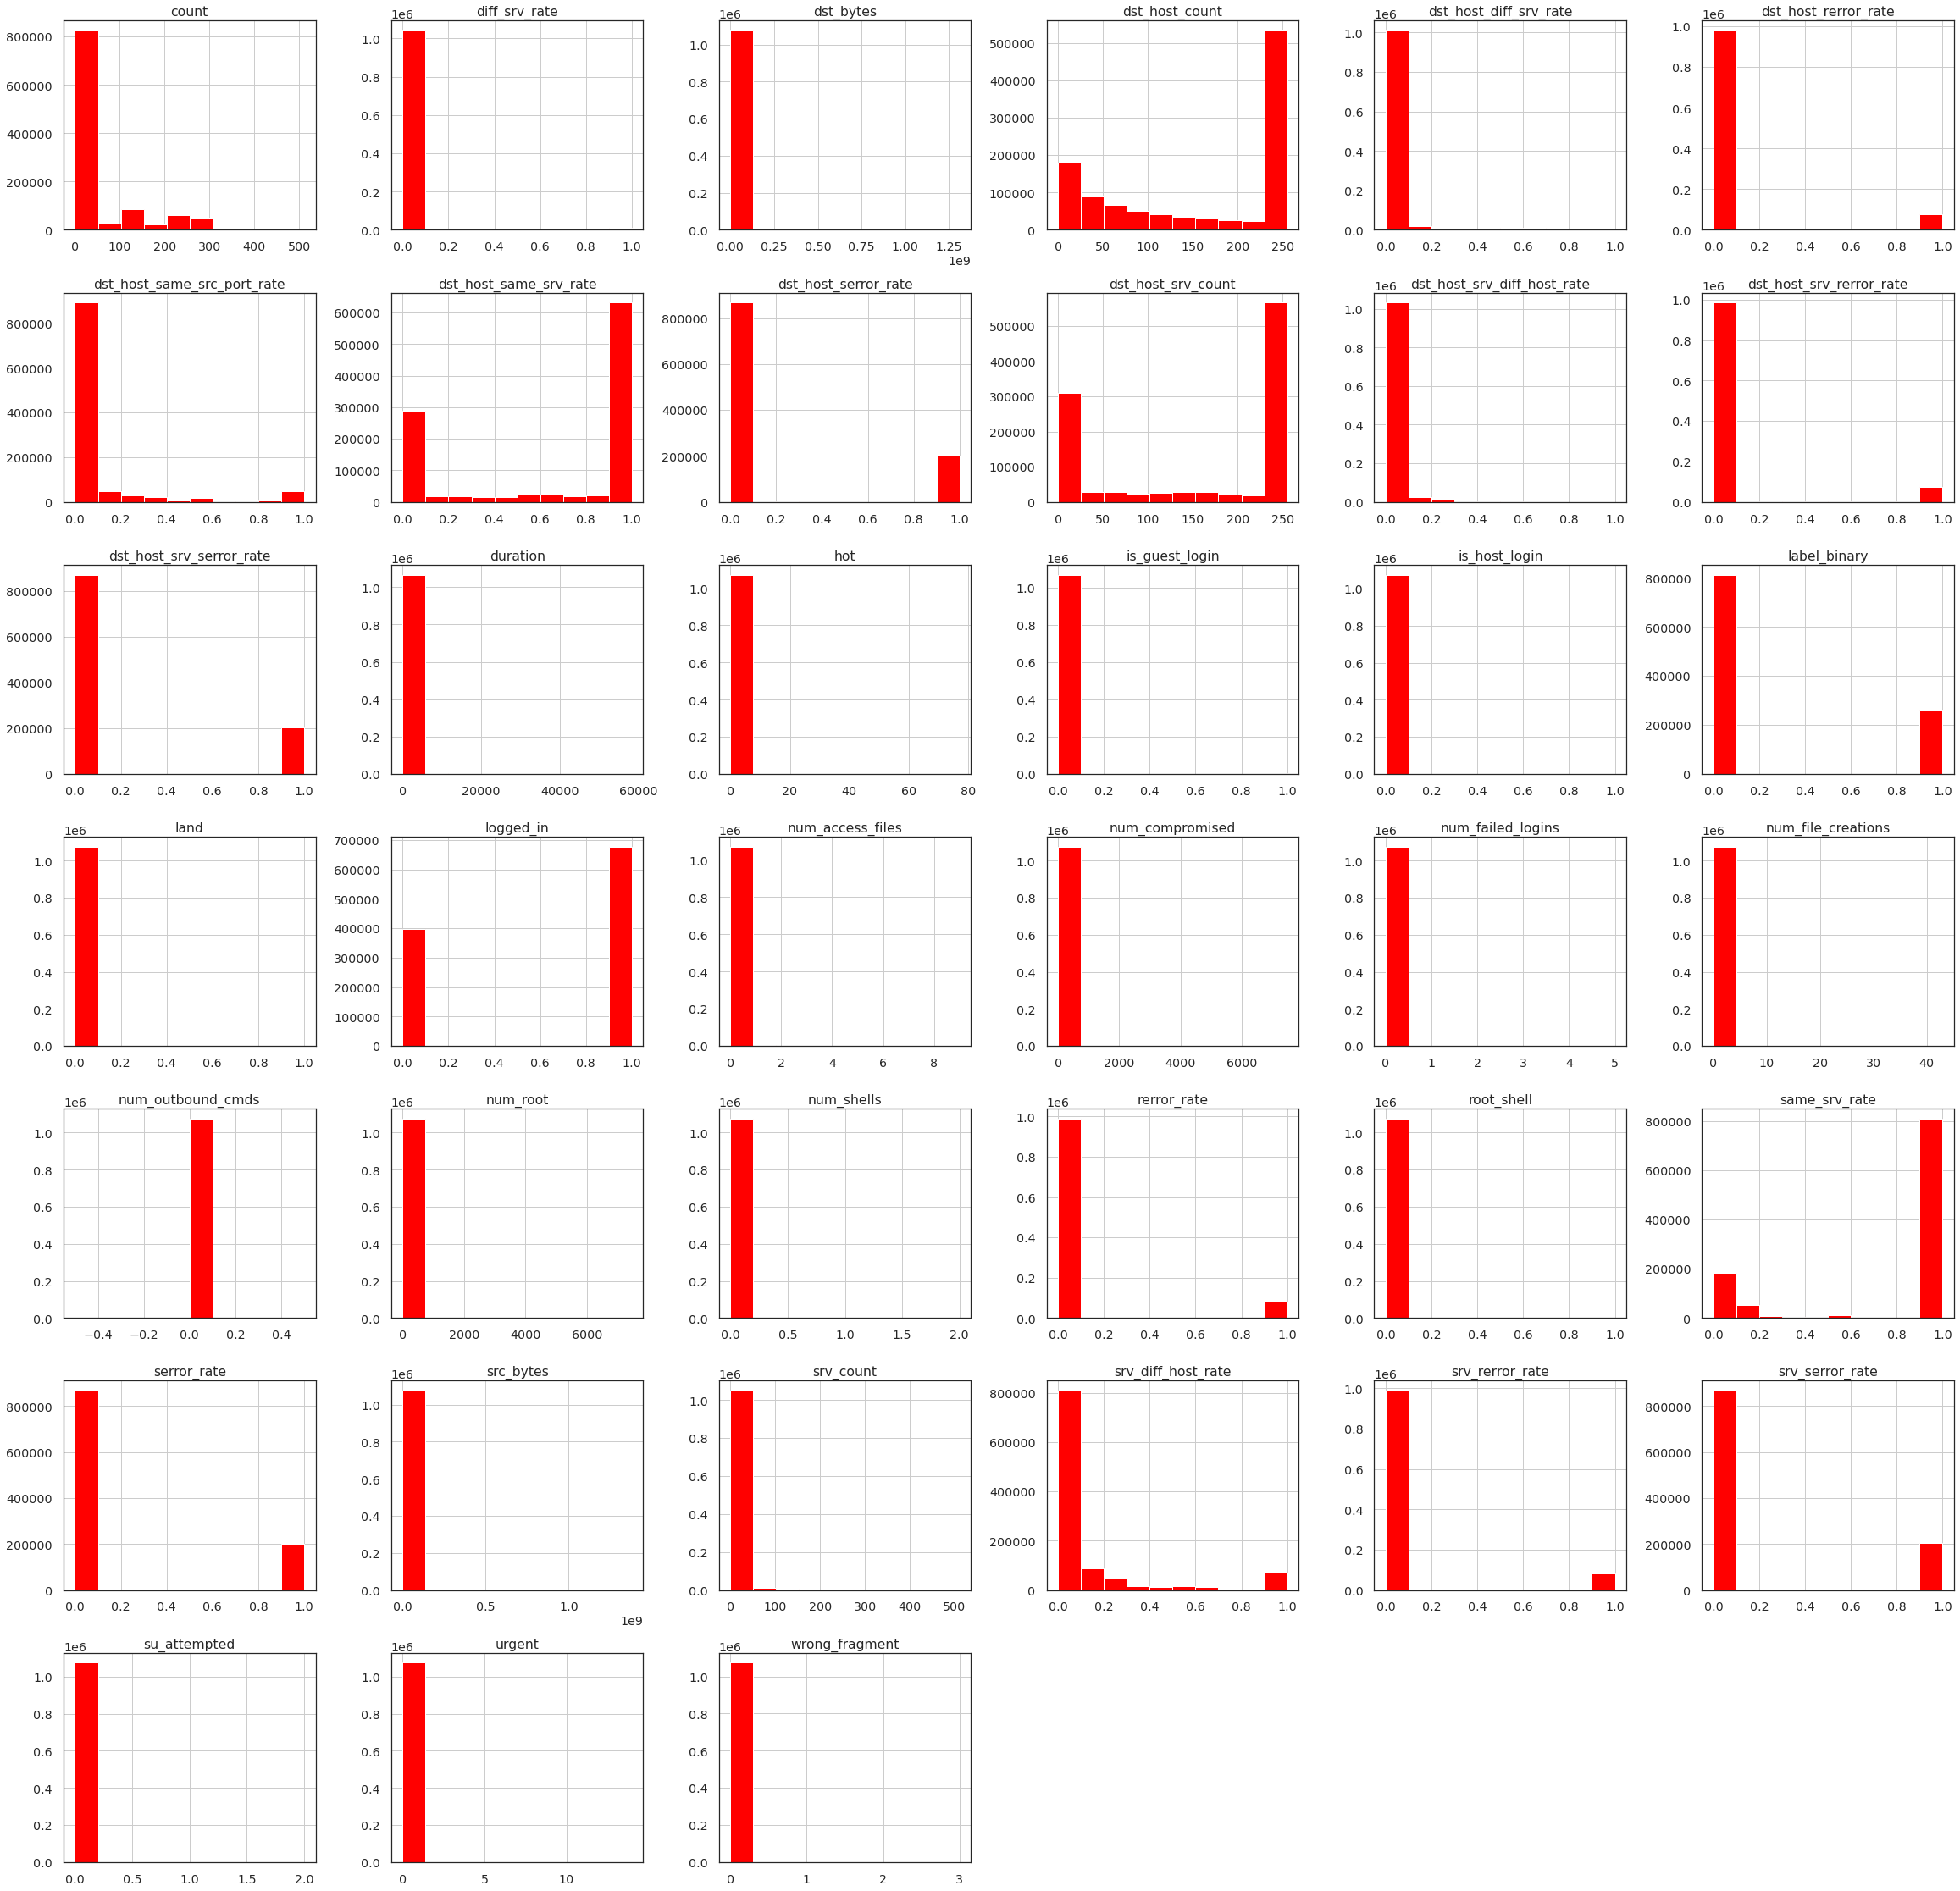

In [ ]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(40,40)})
ax=df.hist(bins=10,color='red', layout=(7,6) )

### Histogram đối với từng thuộc tính theo từng nhãn  
Điều này giúp ta có nhận định trực quan về các features ảnh hưởng tới kết quả như thế nào, xác định features nào là quan trọng, hay không quan trọng.

duration


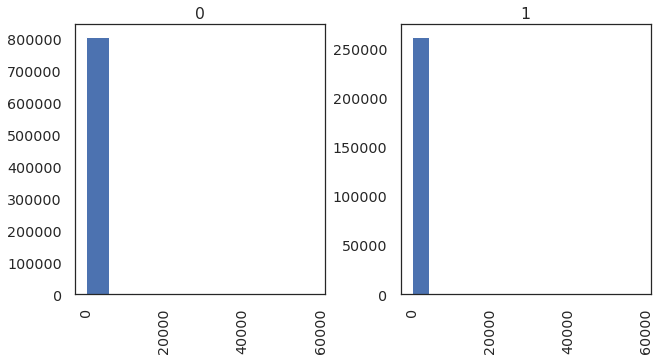

protocol_type


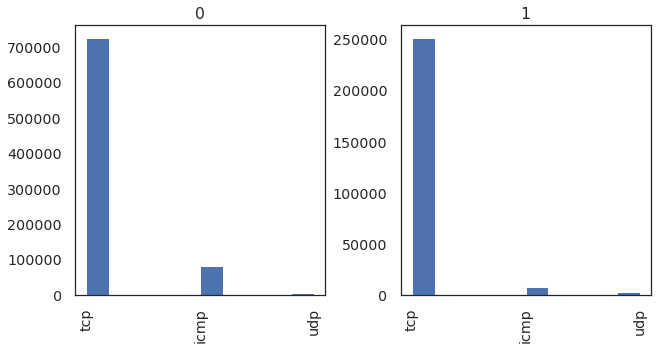

service


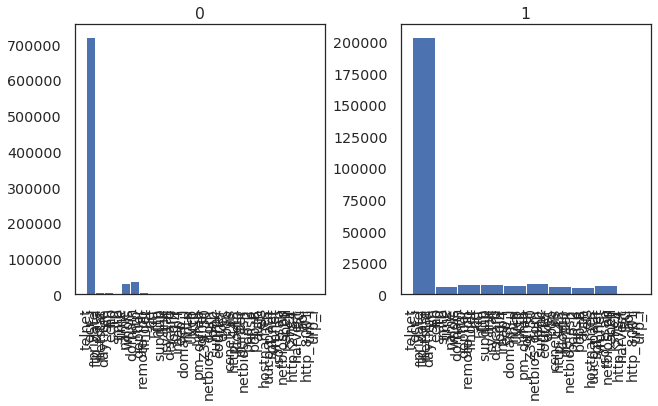

flag


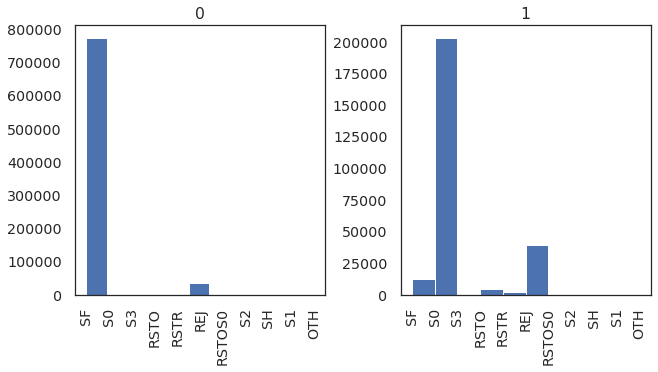

src_bytes


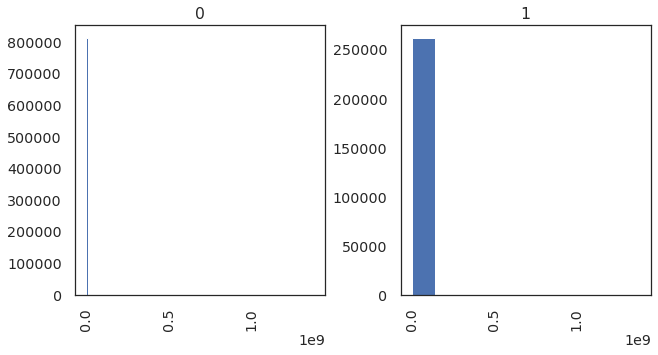

dst_bytes


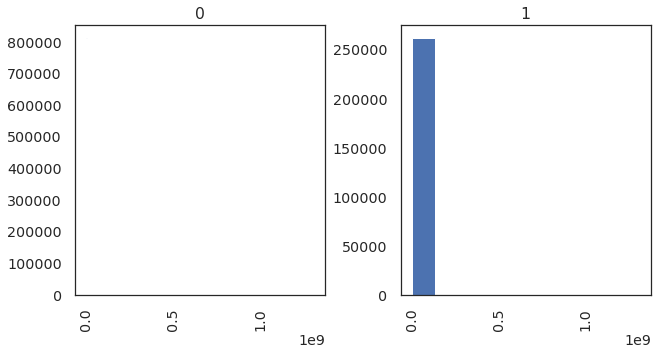

land


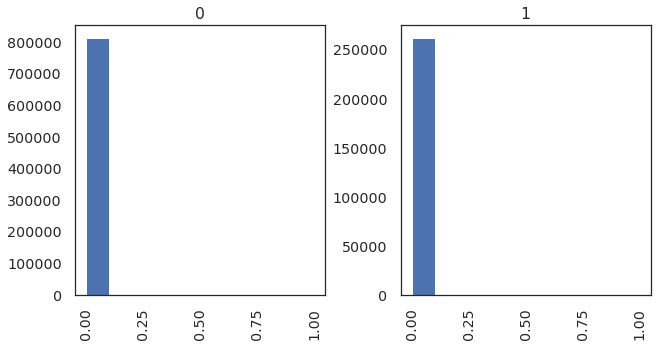

wrong_fragment


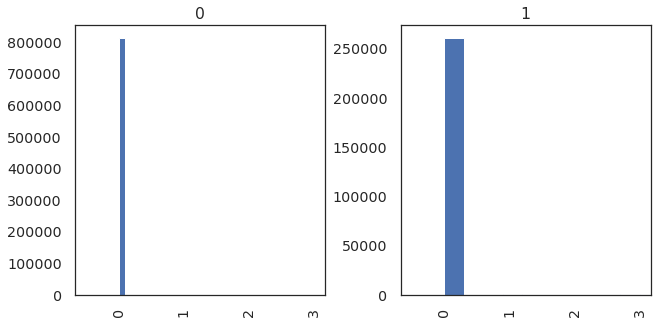

urgent


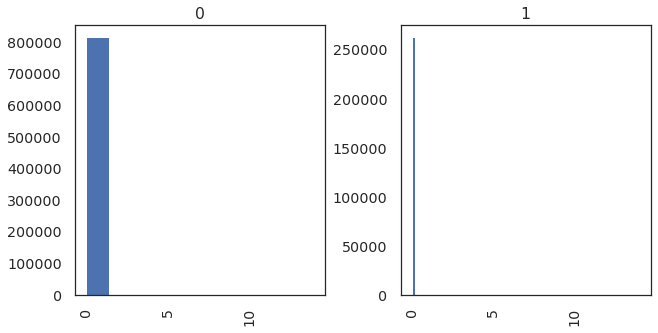

hot


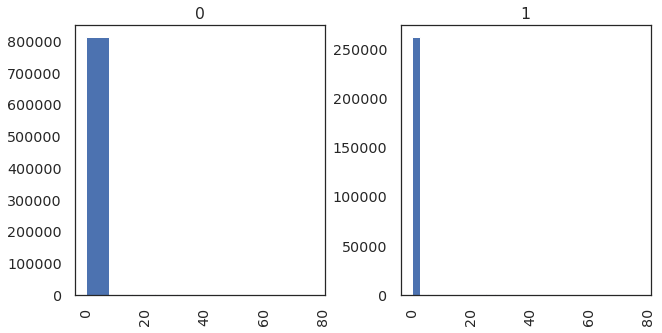

num_failed_logins


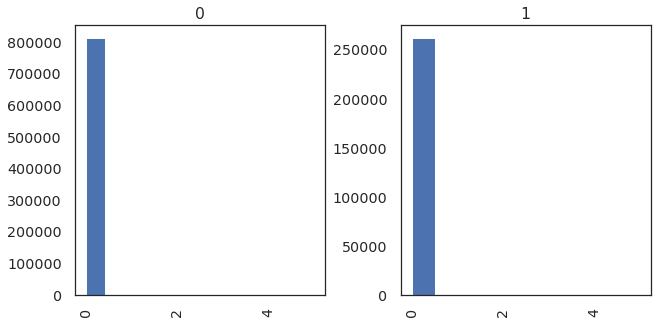

logged_in


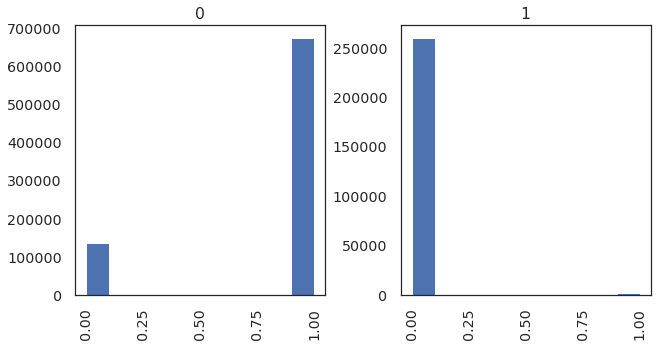

num_compromised


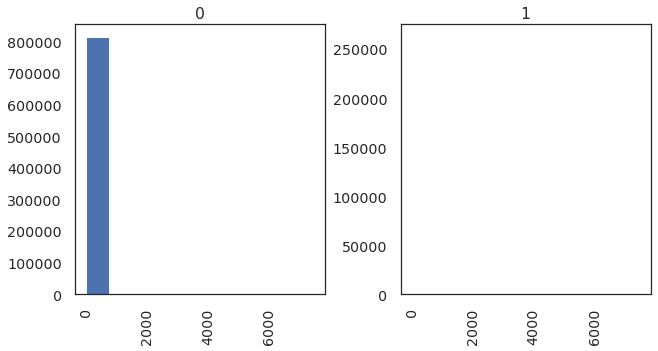

root_shell


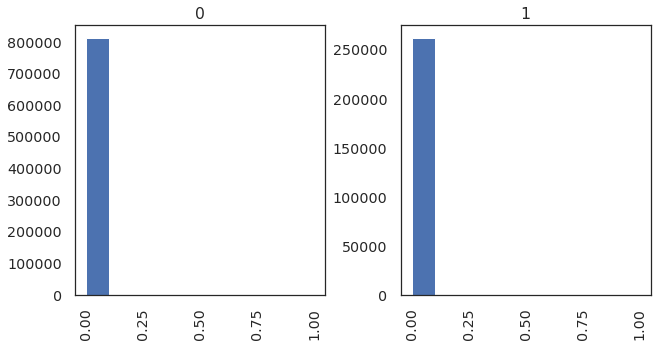

su_attempted


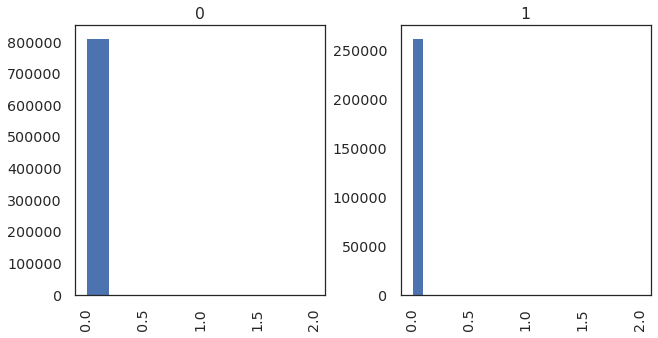

num_root


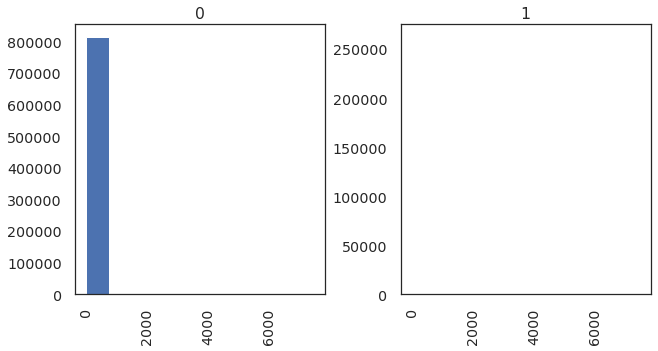

num_file_creations


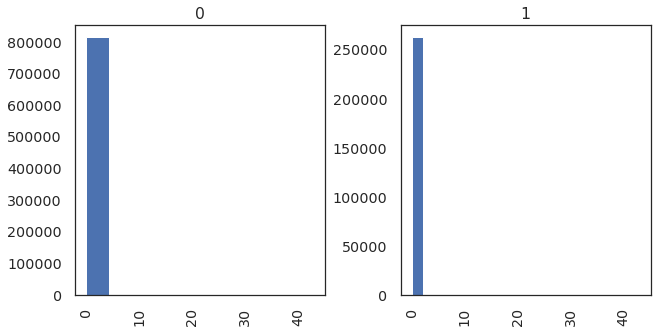

num_shells


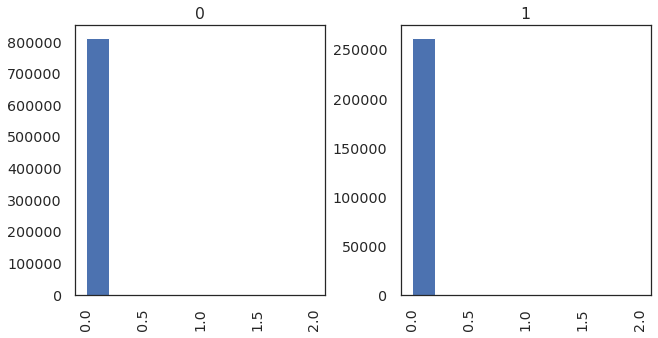

num_access_files


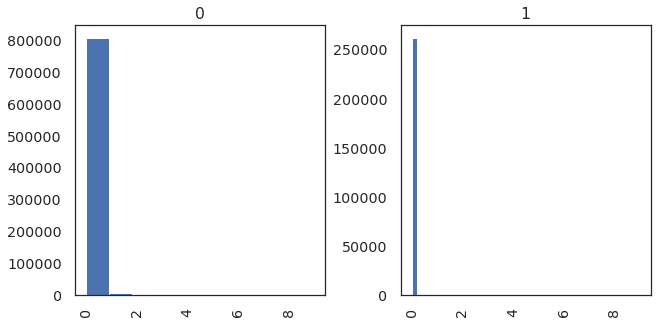

num_outbound_cmds


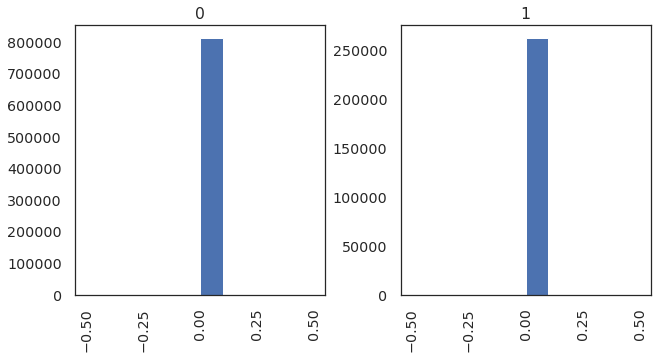

is_host_login


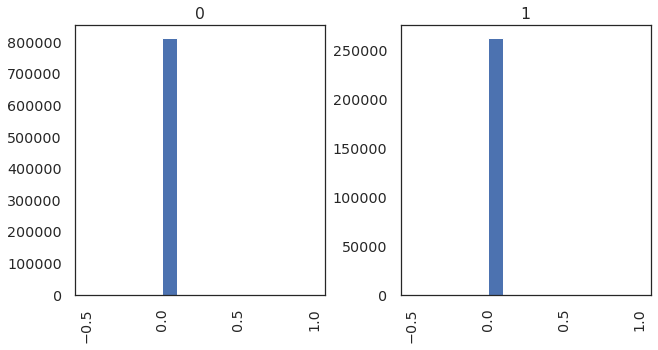

is_guest_login


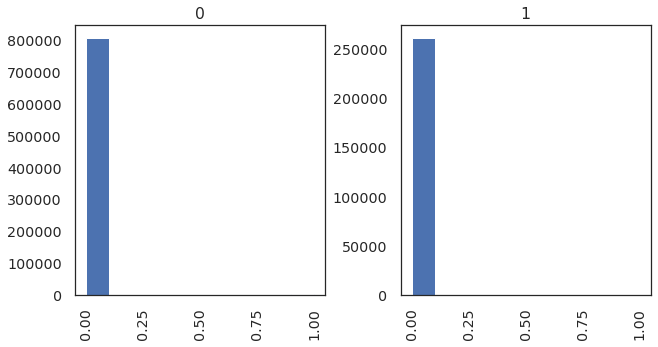

count


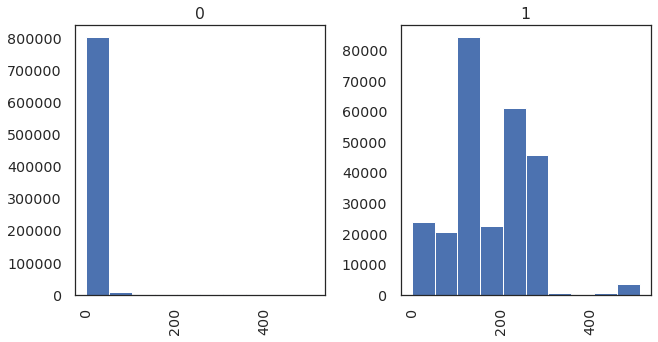

srv_count


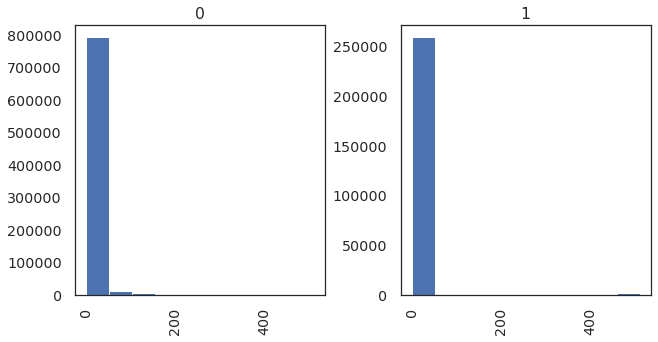

serror_rate


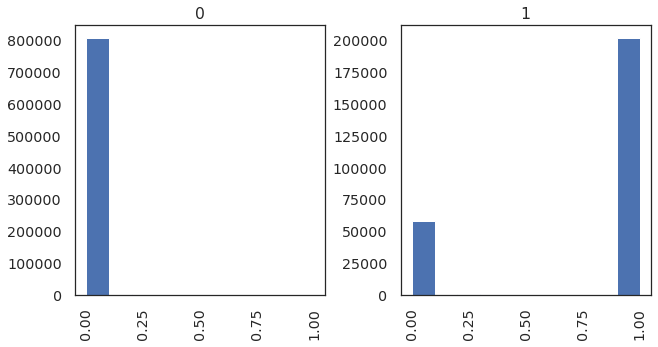

srv_serror_rate


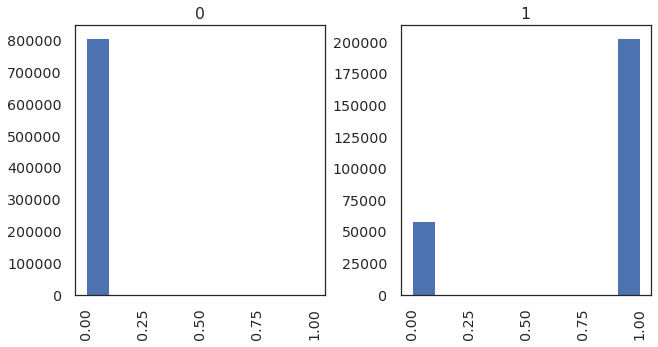

rerror_rate


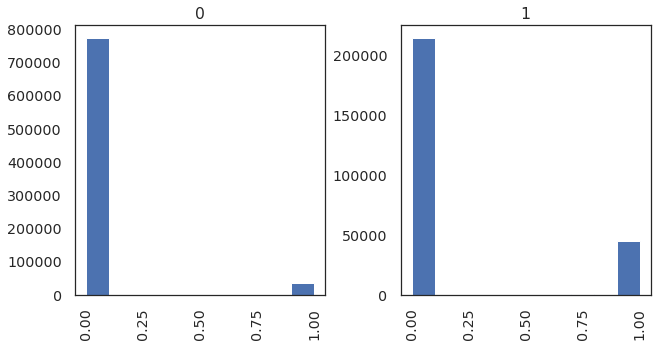

srv_rerror_rate


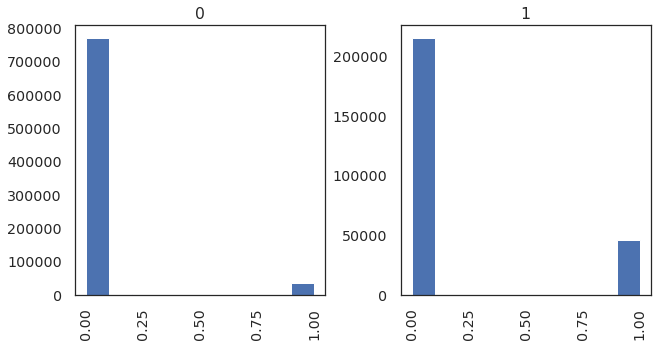

same_srv_rate


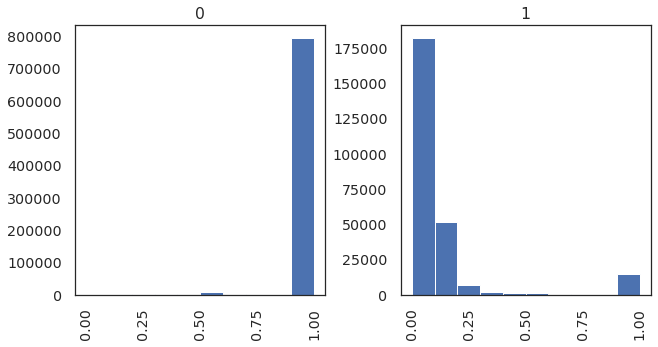

diff_srv_rate


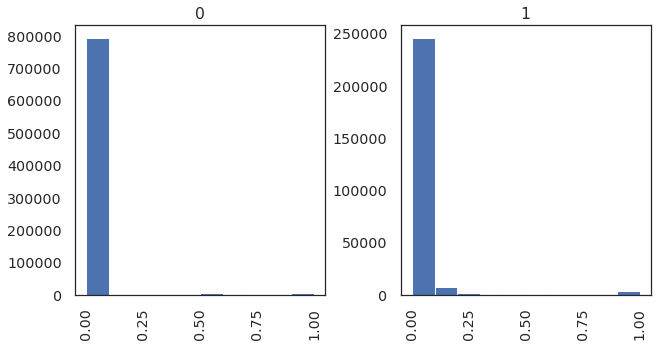

srv_diff_host_rate


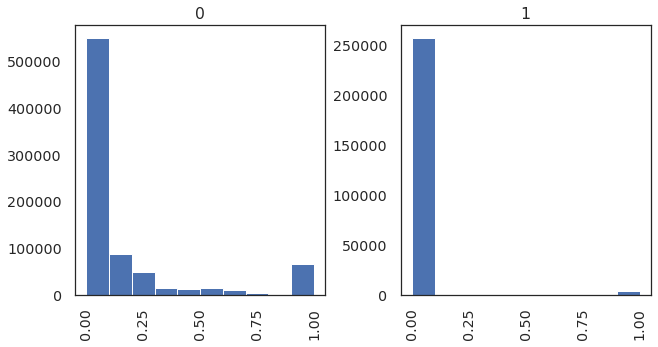

dst_host_count


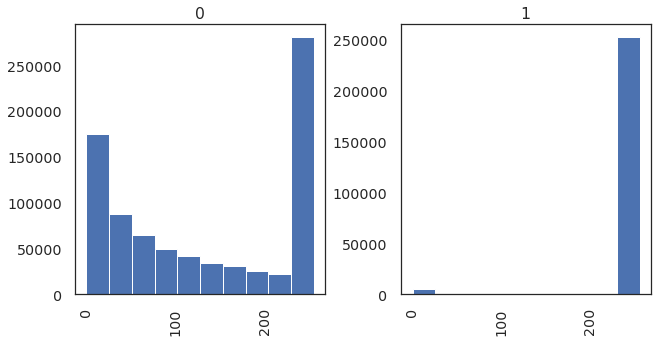

dst_host_srv_count


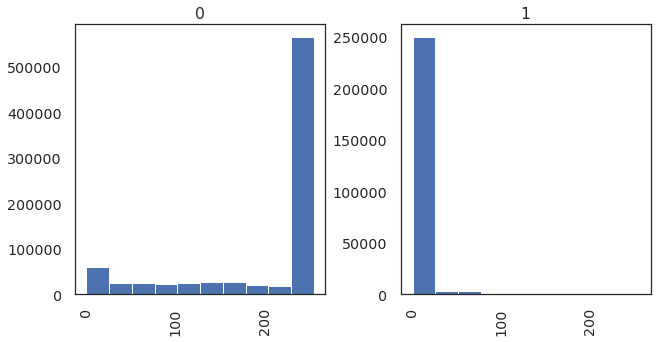

dst_host_same_srv_rate


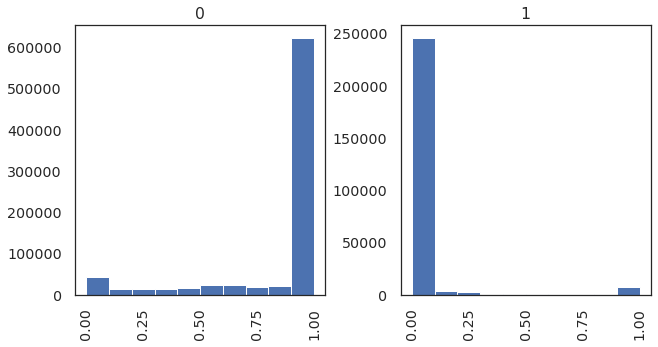

dst_host_diff_srv_rate


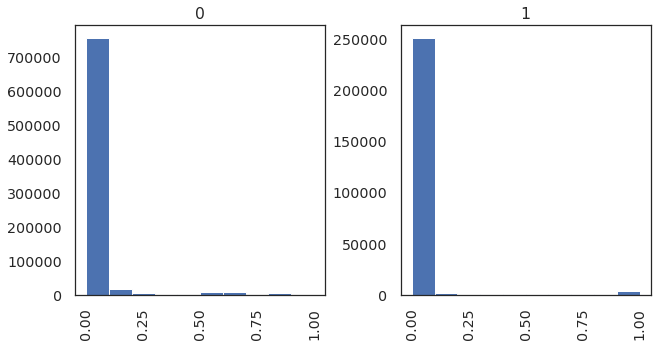

dst_host_same_src_port_rate


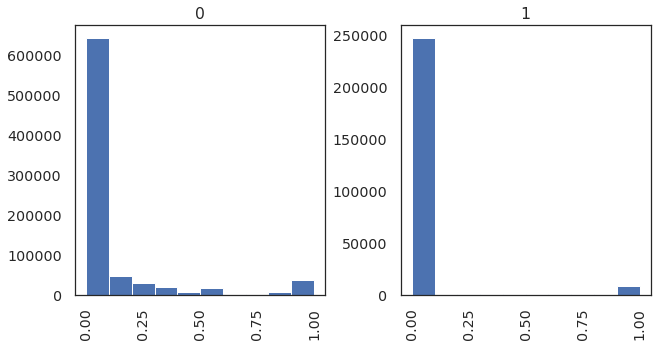

dst_host_srv_diff_host_rate


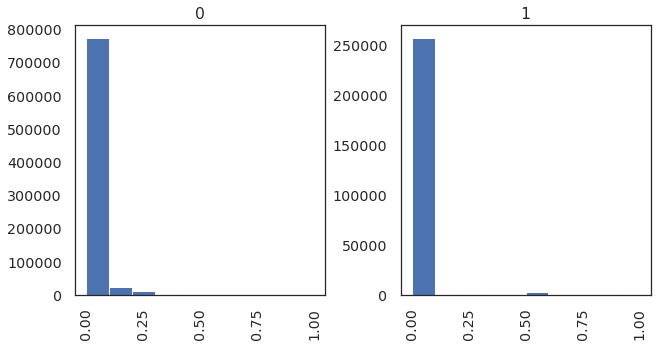

dst_host_serror_rate


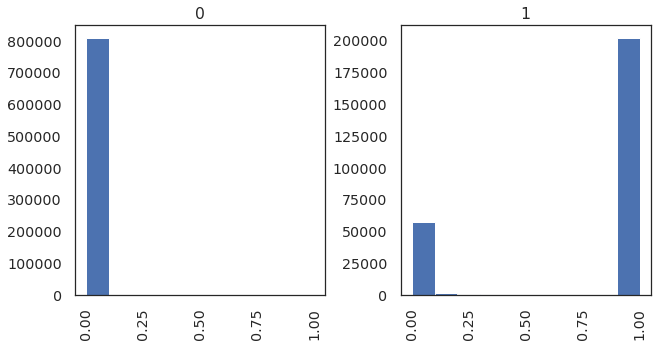

dst_host_srv_serror_rate


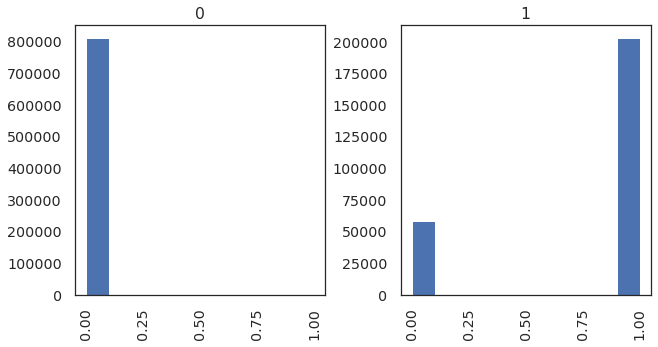

dst_host_rerror_rate


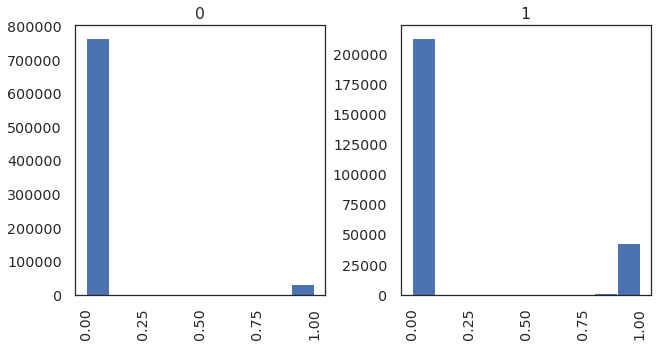

dst_host_srv_rerror_rate


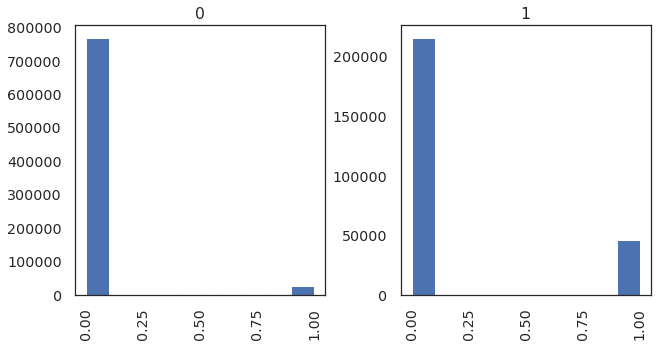

In [ ]:
for col in COLUMNS[:-1]:
    print(col)
    df.hist(column=col, by='label_binary', grid=True, xrot=90,figsize=(10,5), sharex=True)
    plt.show()

Nhận xét:
- Một số feature nhận xét rằng có thể ảnh hưởng lớn tới đầu ra (label): service, flag, src_bytes, wrong_fragment, logged_in, lnum_compromised, lnum_root, lnum_access_files, count, serror_rate, srv_serror_rate, same_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_serror_rate, dst_host_srv_serror_rate
- Các feature thống kê (time-based traffic features) và content features có distribution khác nhau khá lớn đối với 2 class. Có thể đoán rằng đây là những feature quan trọng, là các feature được tổng hợp và mang đặc tính domain knowledge cao hơn.
- Time-based traffic features nổi bật vì hầu hết các tấn công thuộc loại DOS attack.


Với các cột mà giá trị là số, ta xem xét tới các giá trị:
- Trung vị
- Phân vị 25% (Q1), phân vị 75% (Q3)
- 2 giá trị Q1-1.5 x IQR và Q3+1.5 x IQR
- Các thành phần outliers nằm ngoài vùng 2 giá trị trên .

### Boxplot: xem xét phân phối dữ liệu, tìm ra ngoại lệ (outliers)
Boxplot ứng với từng feature

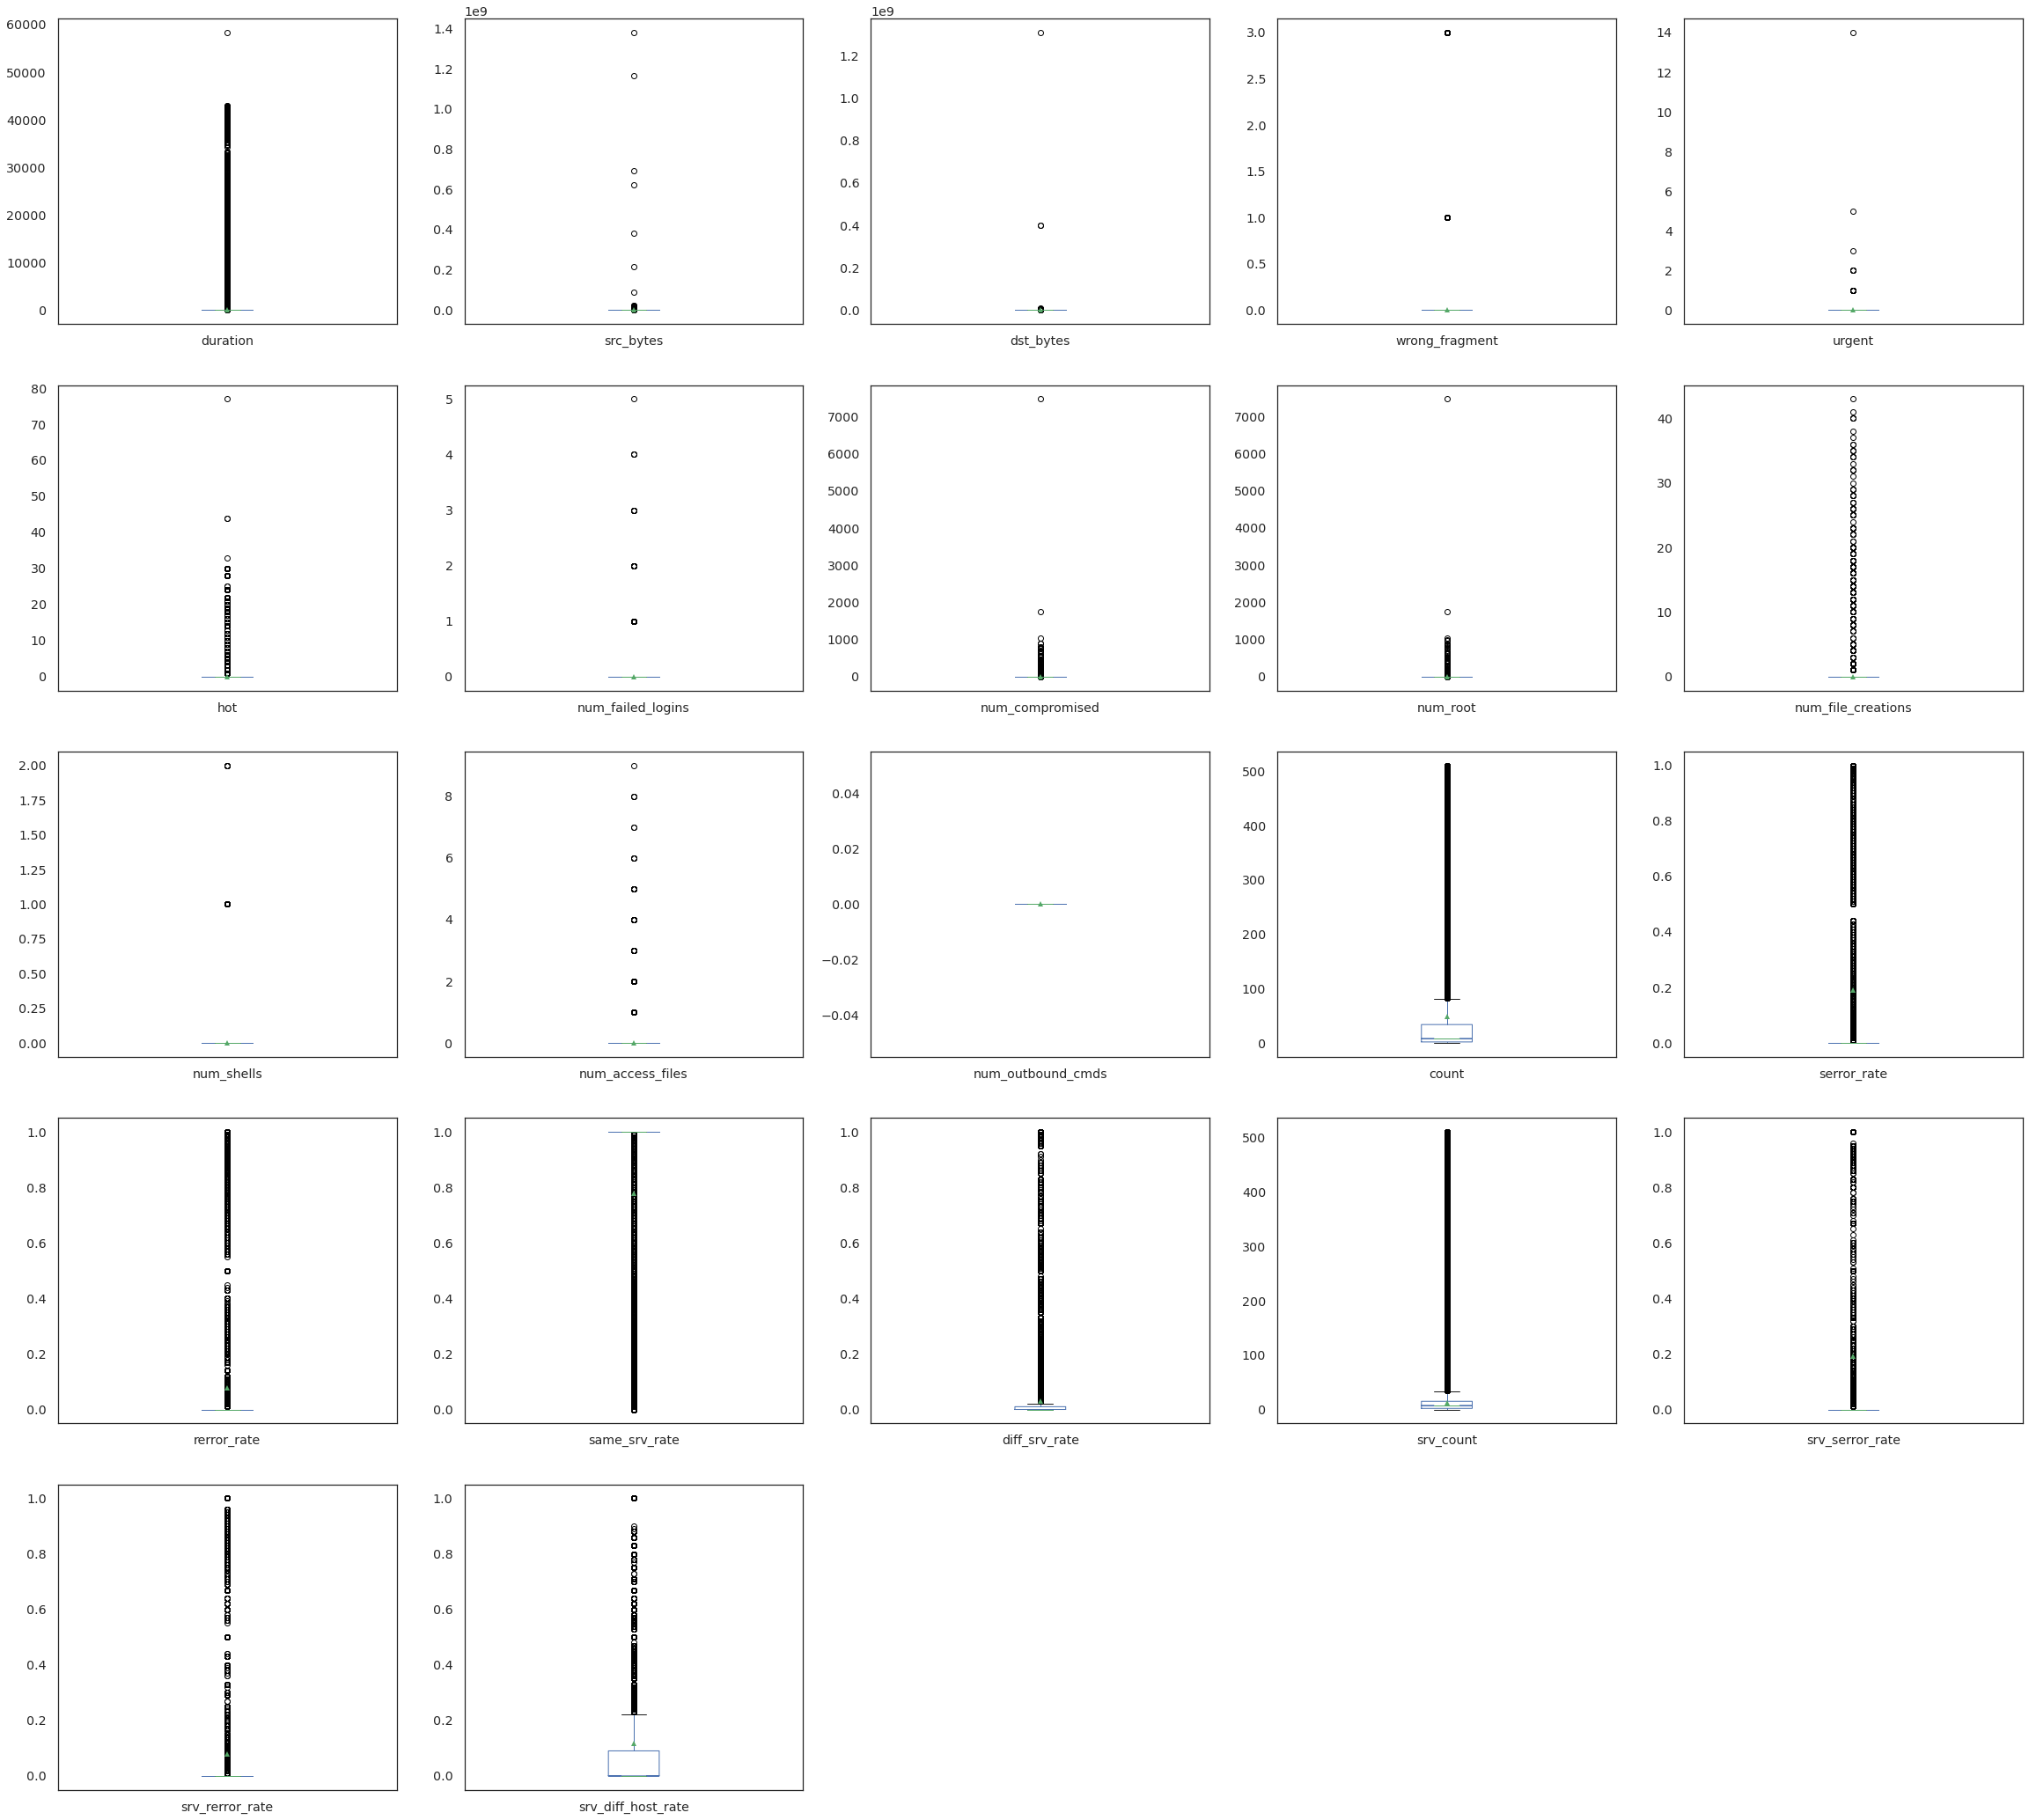

In [ ]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(40, 60)})
# show outliers
ax=df.plot(y=CONTINUOS_COLUMNS, kind = 'box',subplots = True, layout = (8,5),
        sharex = False, sharey = False, grid=False, showcaps=True, showmeans=True, notch=True)

Nhận xét: dữ liệu phân bố không đồng đều, có rất nhiều điểm ngoại lệ

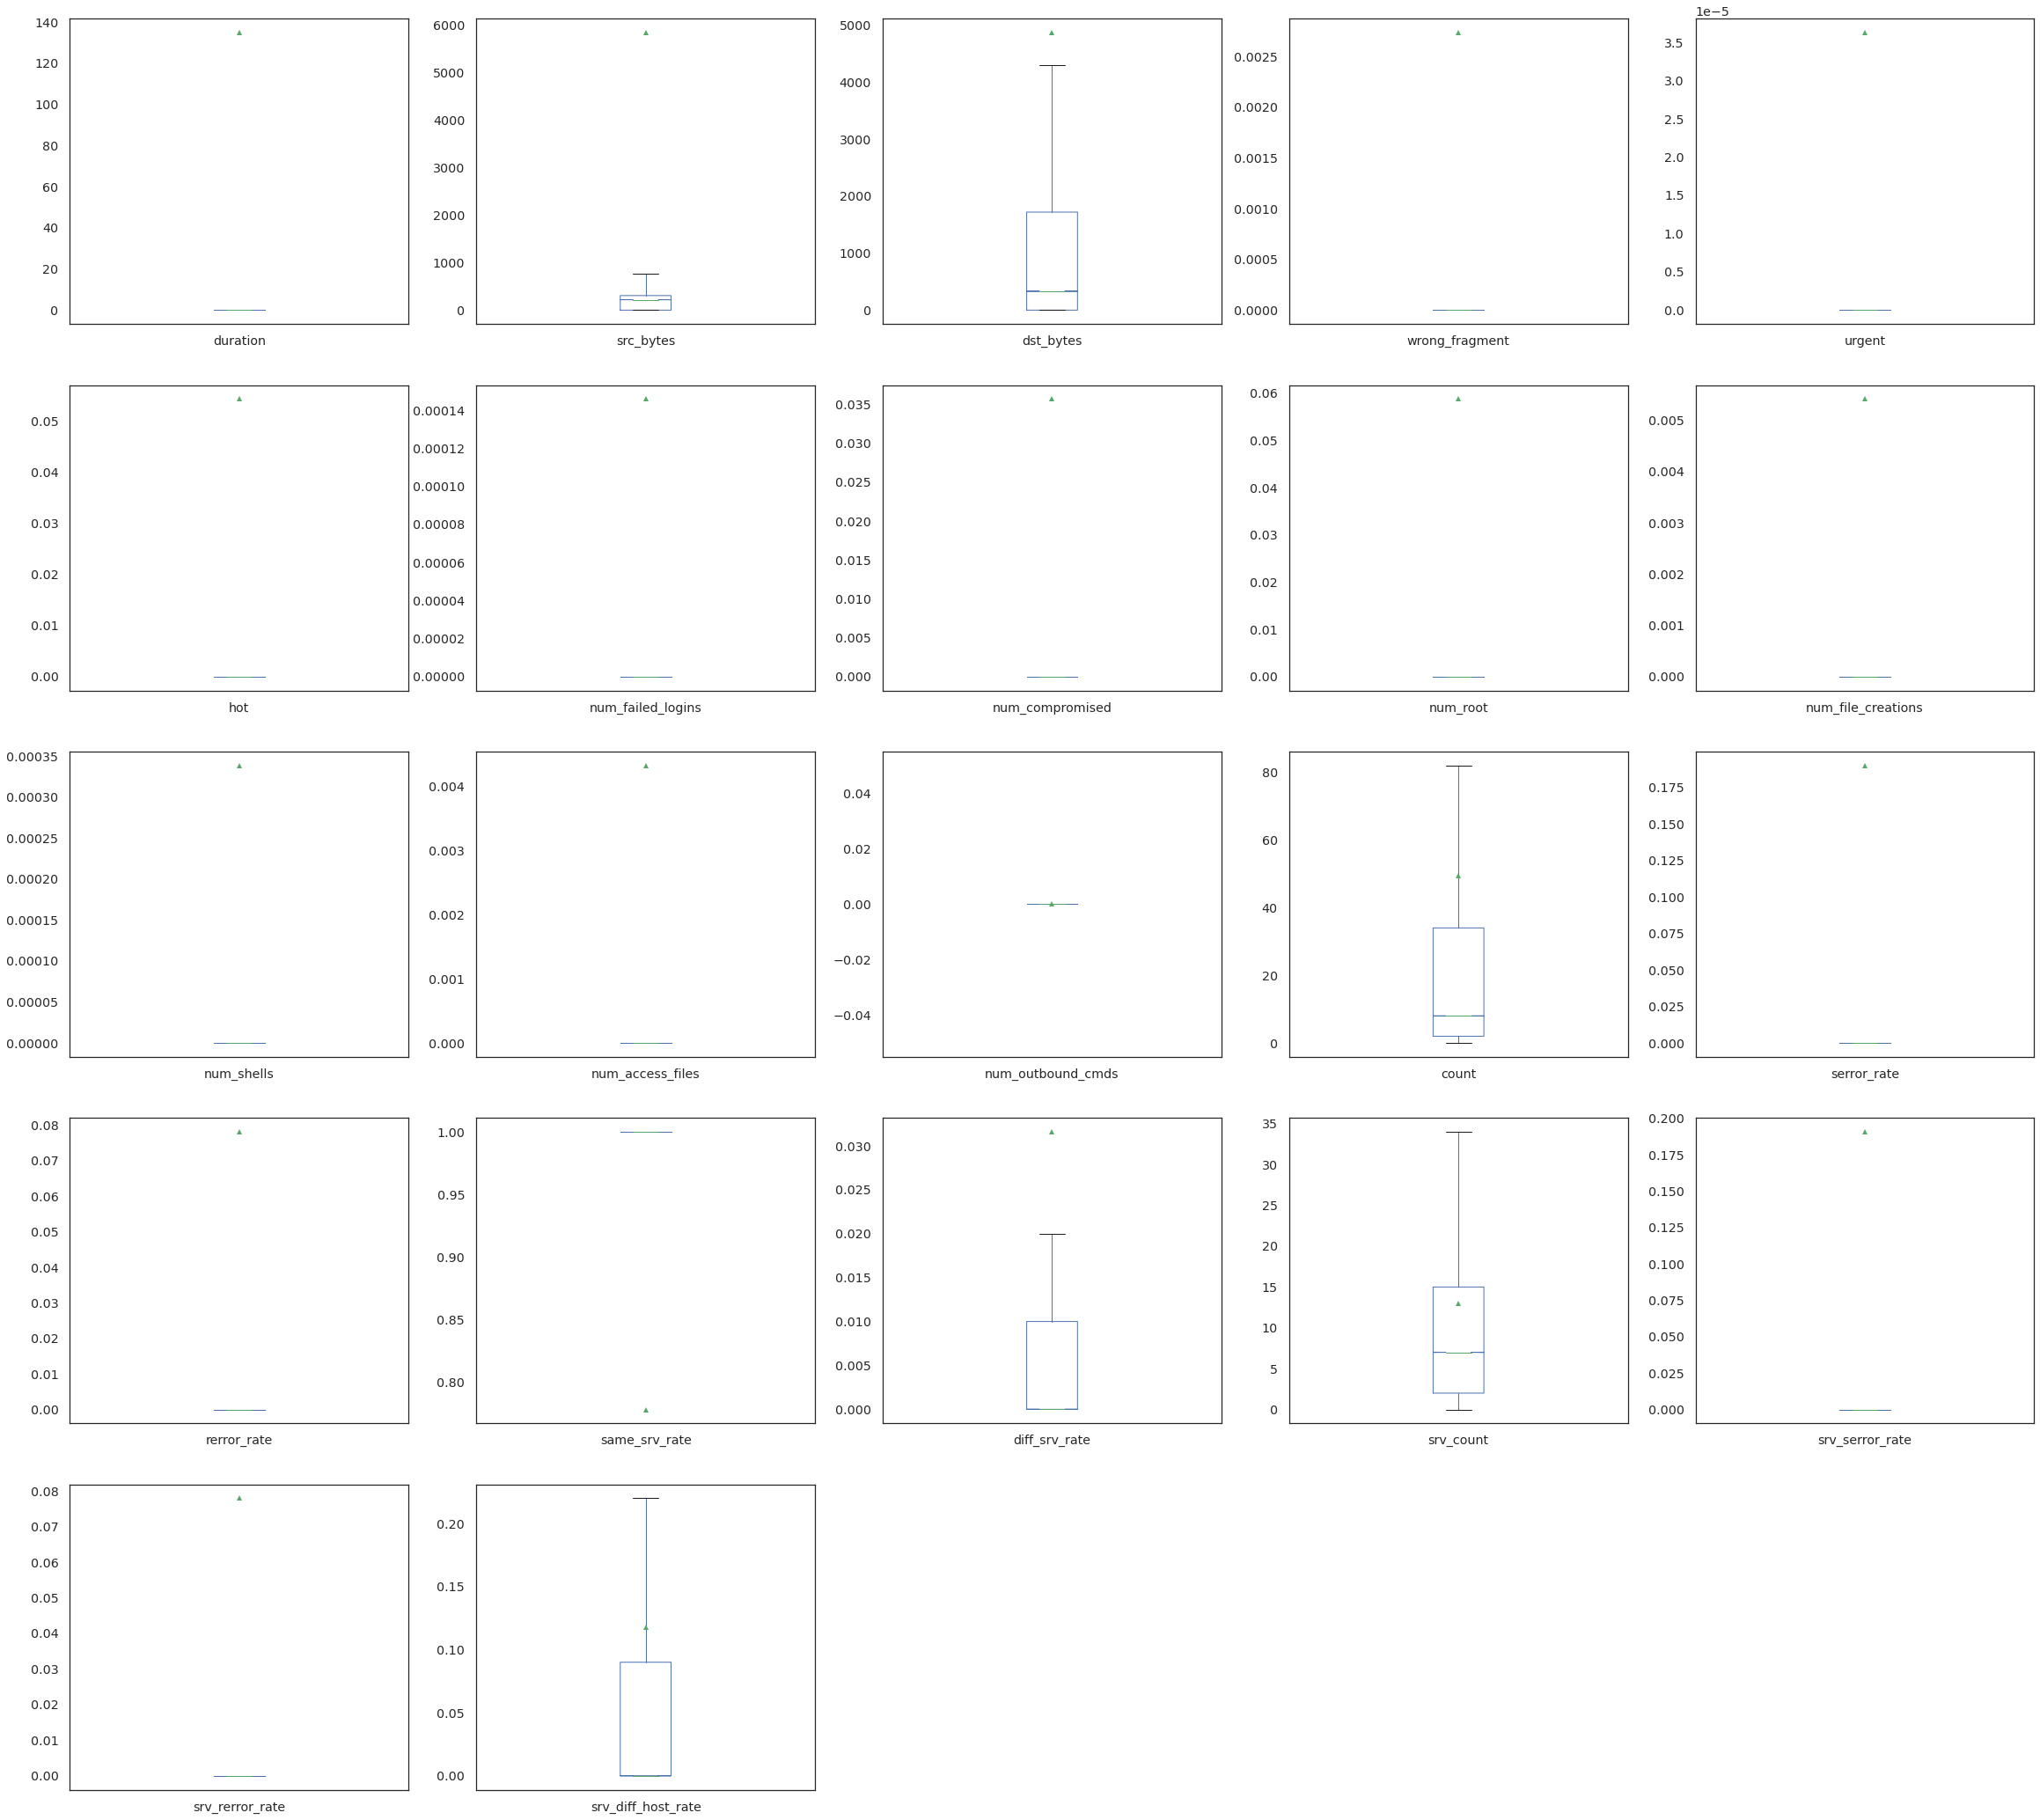

In [ ]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(40, 60)})
# not show outliers
ax=df.plot(y=CONTINUOS_COLUMNS, kind = 'box',subplots = True, layout = (8,5),
        sharex = False, sharey = False, grid=False, showcaps=True, showmeans=True, notch=True, sym='')

## Train-validation-test set

In [ ]:
data=df.to_numpy()
X=data[:, :-2]
Y=data[:,-2:]
print(X.shape, Y.shape)
print(Y)

(1074992, 41) (1074992, 2)
[['normal.' 0]
 ['normal.' 0]
 ['normal.' 0]
 ...
 ['normal.' 0]
 ['normal.' 0]
 ['normal.' 0]]


In [ ]:
x_train_val, x_test, y_train_val, y_test=train_test_split(X, Y, test_size=0.25, random_state=42)
x_train, x_val, y_train, y_val=train_test_split(x_train_val, y_train_val, test_size=0.33, random_state=42)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(540183, 41) (540183, 2) (266061, 41) (266061, 2) (268748, 41) (268748, 2)


In [ ]:
y_train_detail=y_train[:, 0]
y_train=y_train[:, 1].astype(int)
y_val_detail=y_val[:, 0]
y_val=y_val[:, 1].astype(int)
y_test_detail=y_test[:, 0]
y_test=y_test[:, 1].astype(int)
print(y_train_detail.shape, y_train.shape)
print(y_train_detail, y_train)

(540183,) (540183,)
['neptune.' 'normal.' 'normal.' ... 'normal.' 'pod.' 'normal.'] [1 0 0 ... 0 1 0]


## Chuẩn hóa dữ liệu

Các categorical features sẽ được encode dưới dạng one-hot vector để đưa vào mô hình.

In [ ]:
encoder1=OneHotEncoder(handle_unknown='ignore', sparse=False)
x_train_1= encoder1.fit_transform(x_train[:, 1:2])
x_val_1=encoder1.transform(x_val[:, 1:2])
x_test_1=encoder1.transform(x_test[:, 1:2])

encoder2=OneHotEncoder(handle_unknown='ignore', sparse=False)
x_train_2= encoder2.fit_transform(x_train[:, 2:3])
x_val_2=encoder2.transform(x_val[:, 2:3])
x_test_2=encoder2.transform(x_test[:, 2:3])

encoder3=OneHotEncoder(handle_unknown='ignore', sparse=False)
x_train_3= encoder3.fit_transform(x_train[:, 3:4])
x_val_3=encoder3.transform(x_val[:, 3:4])
x_test_3=encoder3.transform(x_test[:, 3:4])

x_train=np.concatenate([x_train[:,0:1], x_train_1, x_train_2, x_train_3, x_train[:,4:]], axis=1)
x_val=np.concatenate([x_val[:,0:1], x_val_1, x_val_2, x_val_3, x_val[:,4:]], axis=1)
x_test=np.concatenate([x_test[:,0:1], x_test_1, x_test_2, x_test_3, x_test[:,4:]], axis=1)

print(x_train.shape, x_val.shape, x_test.shape)

(540183, 120) (266061, 120) (268748, 120)


In [ ]:
print(x_train[0,:])

[0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0
 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 108 3 0.0 0.0 1.0 1.0 0.03 0.07 0.0 255 3 0.01 0.06 0.0 0.0 0.0 0.0 1.0
 1.0]


Chuẩn hóa z-score toàn bộ feature

In [ ]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train=scaler.transform(x_train)
x_val=scaler.transform(x_val)
x_test=scaler.transform(x_test)
print('Example of features vector')
print(x_train[0,:])

Example of features vector
[-1.02860925e-01 -1.05561075e-01  3.14558414e-01 -2.92911518e-01
 -2.19019895e-02 -1.03625552e-02 -3.06504904e-02 -1.92417845e-03
 -5.61209886e-02 -3.12794320e-02 -2.96978118e-02 -3.08915913e-02
 -3.11903567e-02 -3.16918195e-02 -3.10413321e-02 -3.10413321e-02
 -2.13427353e-01 -3.05595890e-02 -7.03863215e-02 -5.92545270e-02
 -2.91622130e-02 -2.96665727e-02 -8.02785969e-02 -6.90998082e-02
 -1.97563302e-01 -3.13978075e-02 -3.01932570e-02 -1.08343707e+00
 -1.36059837e-03 -2.92574404e-02 -1.36059837e-03 -3.15157402e-02
 -3.11308322e-02 -3.05595890e-02 -3.03158577e-02 -3.14568289e-02
 -3.11903567e-02 -3.02546192e-02 -3.13682554e-02 -3.07712761e-02
 -3.07109424e-02 -3.03769732e-02 -3.05899193e-02 -3.08314922e-02
 -3.02239536e-02 -3.05595890e-02 -4.55203525e-02 -1.72384204e-01
 -3.09815223e-02 -4.21500161e-02 -2.86166262e-02 -4.76693602e-01
 -2.72120429e-03 -3.13978075e-02 -3.04379664e-02 -3.05595890e-02
 -3.13729702e-01 -3.10711940e-02 -3.11903567e-02 -3.03769732e-0

## Metrics
Ở đây, metrics mà ta quan tâm tới là precision-recall và F1-score.  
$$Accuracy = \frac{TP+TN}{TP+FP+TN+FN}$$  
$$Precision = \frac{M_{i,i}}{\sum_j M_{i,j}}$$
số giá trị i chính xác trên số giá trị i thực tế  
$$Recall = \frac{M_{i,i}}{\sum_i M_{i,j}}$$
số giá trị i chính xác trên số giá trị i dự đoán  
$$F1-score = 2 * \frac{precision * recall}{precision + recall}$$

In [ ]:
def evaluate(labels, scores, roc=True, labels_detail=None):
    """Print metrics included Confusion matrix, accuracy, Precision, Recall, F1 score per class."""
    # metrics = sklm.precision_recall_fscore_support(labels, scores)
    labels=labels.astype(np.float32)
    scores2=(scores>0.5).astype(np.float32).reshape(-1,)

    print('Classification report:')
    report = sklm.classification_report(labels, scores2)
    print(report)

    # print confusion matrix
    conf = sklm.confusion_matrix(labels, scores2)
    print('Confusion matrix:')
    print(conf)

    # plot confusion matrix
    n_conf=sklm.confusion_matrix(labels, scores2, normalize='true')
    df_conf = pd.DataFrame(conf, index = ['Actual:Negative', 'Actual: Positive'],
                    columns = ['Predicted: Negative', 'Predicted: Positve'])
    plt.figure(figsize = (5,5))
    sns.heatmap(df_conf, annot=True, fmt='.2f')
    plt.show()

    # plot ROC
    if roc:
        fpr, tpr, thresholds = roc_curve(labels, scores, pos_label = 1.)
        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',
                lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) curve')
        plt.legend(loc="lower right")
        plt.show()
    if labels_detail is not None:
        missed = labels != scores2
        print(missed)
        miss_idxs=[]
        for i in range(len(missed)):
            if missed[i]:
                miss_idxs.append(i)
        print(f'{len(miss_idxs)} sample miss-classified.')
        miss_detail=labels_detail[miss_idxs]
        miss_dict={}
        for x in miss_detail:
            if x in miss_dict:
                miss_dict[x]+=1
            else:
                miss_dict[x]=1
        print('Miss-classified samples:')
        print(miss_dict)

    
    # Manually
#     print('                 Confusion matrix')
#     print('                 Score positive    Score negative')
#     print('Actual positive    %6d' % conf[1,1] + '             %5d' % conf[1,0])
#     print('Actual negative    %6d' % conf[0,1] + '             %5d' % conf[0,0])

#     print('')
#     print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
#     print(' ')
#     print('           Positive      Negative')
#     print('Num case   %6d' % metrics[3][1] + '        %6d' % metrics[3][0])
#     print('Precision  %6.2f' % metrics[0][1] + '        %6.2f' % metrics[0][0])
#     print('Recall     %6.2f' % metrics[1][1] + '        %6.2f' % metrics[1][0])
#     print('F1         %6.2f' % metrics[2][1] + '        %6.2f' % metrics[2][0])

## Training  models

In [1]:
!mkdir checkpoints

### Multi-layer Perceptron (MLP) với Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Input
from keras import Model
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
from keras import optimizers
from keras import backend as K
from keras.regularizers import l2

Using TensorFlow backend.


**Detail:**
- Keras
- Callback function:   
  -  Model checkpoint to save best model with the highest accuracy on validation set.
  -  Reduce learning rate 10 time when model is not improved after 5 epochs
  - Early stopping when model is not improved after 8 epochs
- Multi-classes cross-entropy loss function
- Training on maximum 200 epochs

In [ ]:
def plot_learning_curve(history):
    sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(6,6)})
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='lower right')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

In [ ]:
# callback functions on end of each epoch
reduce_lr=ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5,verbose=1)
early_stop=EarlyStopping(monitor='val_loss', min_delta=0, patience=8, restore_best_weights=True, verbose=1)

Define các metric phù hợp mà ta quan tâm: precision, recall, f1-score để theo dõi trong quá trình training mô hình

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
def mlp(input_shape=(120,), num_classes=1, weight_decay=1e-3):
    # Input layer
    input = Input(input_shape)
    # x = Flatten()(input)
    x = Dense(units=128, activation='relu', kernel_regularizer=l2(weight_decay))(input)
    x = Dense(units=128, activation='relu', kernel_regularizer=l2(weight_decay))(x)
    output = Dense(units=num_classes, activation='sigmoid')(x)
    model = Model(inputs=input, outputs=output)
    return model

In [ ]:
BATCH_SIZE=4096
model_checkpoint=ModelCheckpoint(f'checkpoints/best_weights_mlp.hdf5', 
                             monitor='val_loss',save_best_only=True, save_weights_only=True)

mlp_model=mlp(input_shape=(120,), num_classes=1, weight_decay=1e-3)
print(mlp_model.summary())
mlp_model.compile(optimizer=optimizers.Adam(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy', f1_m, precision_m, recall_m])
history=mlp_model.fit(x_train, y_train, validation_data=(x_val, y_val), shuffle=True, epochs=200, workers=4,
                      batch_size=BATCH_SIZE, callbacks=[model_checkpoint, reduce_lr, early_stop])

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 120)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               15488     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 32,129
Trainable params: 32,129
Non-trainable params: 0
_________________________________________________________________
None
Train on 540183 samples, validate on 266061 samples
Epoch 1/200
540183/540183 [==============================] - 2s 3us/step - loss: 0.0888 - accuracy: 0.9913 - f1_m: 0.9844 - precision_m: 0.9872 - recall_m: 0.9821 - val_loss: 0.0207 - val_accuracy

dict_keys(['val_loss', 'val_accuracy', 'val_f1_m', 'val_precision_m', 'val_recall_m', 'loss', 'accuracy', 'f1_m', 'precision_m', 'recall_m', 'lr'])


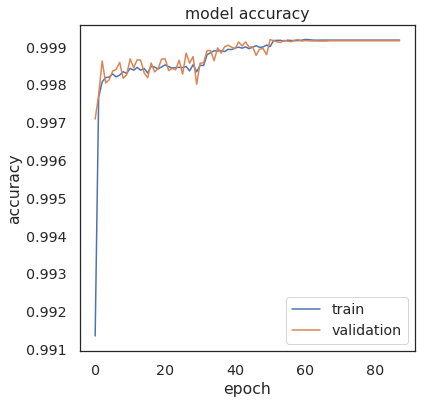

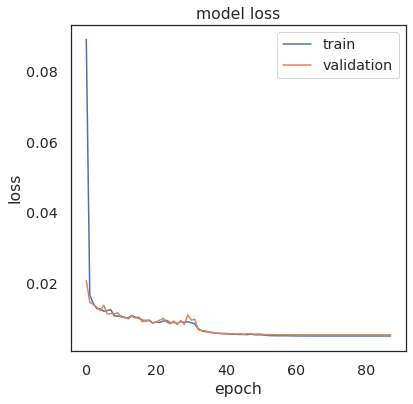

In [ ]:
print(history.history.keys())
plot_learning_curve(history)

In [ ]:
mlp_model.evaluate(x_val, y_val)

266061/266061 [==============================] - 17s 65us/step


[0.0053137513415403995,
 0.9991505742073059,
 0.9980024695396423,
 0.998497724533081,
 0.9977900385856628]

#### Kết quả trên test set

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    203288
         1.0       1.00      1.00      1.00     65460

    accuracy                           1.00    268748
   macro avg       1.00      1.00      1.00    268748
weighted avg       1.00      1.00      1.00    268748

Confusion matrix:
[[203174    114]
 [   149  65311]]


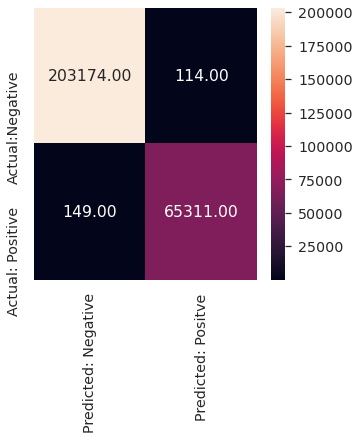

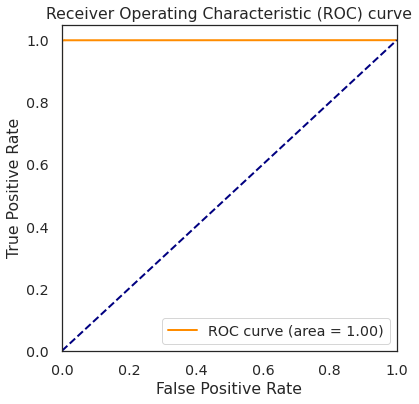

[False False False ... False False False]
263 sample miss-classified.
Miss-classified samples:
{'normal.': 114, 'ipsweep.': 18, 'portsweep.': 16, 'warezclient.': 46, 'satan.': 26, 'nmap.': 9, 'back.': 4, 'smurf.': 10, 'imap.': 2, 'rootkit.': 1, 'buffer_overflow.': 5, 'land.': 7, 'guess_passwd.': 2, 'warezmaster.': 1, 'multihop.': 1, 'spy.': 1}


In [ ]:
y_test_pred=mlp_model.predict(x_test)
evaluate(y_test, y_test_pred, labels_detail=y_test_detail)

### Logistic Regression với Keras

In [ ]:
def logistic(input_shape=(120,), num_classes=1, weight_decay=1e-3):
    # Input layer
    input = Input(input_shape)
    # x = Flatten()(input)
    output = Dense(units=num_classes, activation='sigmoid')(input)
    model = Model(inputs=input, outputs=output)
    return model

In [ ]:
BATCH_SIZE=4096
model_checkpoint=ModelCheckpoint(f'checkpoints/best_weights_logistic.hdf5', 
                             monitor='val_loss',save_best_only=True, save_weights_only=True)

logistic_model=logistic(input_shape=(120,), num_classes=1, weight_decay=1e-3)
print(logistic_model.summary())
logistic_model.compile(optimizer=optimizers.Adam(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy', f1_m, precision_m, recall_m])
history=logistic_model.fit(x_train, y_train, validation_data=(x_val, y_val), shuffle=True, epochs=200, workers=4,
                      batch_size=BATCH_SIZE, callbacks=[model_checkpoint, reduce_lr, early_stop])

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 120)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 121       
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
None
Train on 540183 samples, validate on 266061 samples
Epoch 1/200
540183/540183 [==============================] - 1s 3us/step - loss: 0.0907 - accuracy: 0.9867 - f1_m: 0.9738 - precision_m: 0.9695 - recall_m: 0.9790 - val_loss: 0.0308 - val_accuracy: 0.9954 - val_f1_m: 0.9906 - val_precision_m: 0.9926 - val_recall_m: 0.9886
Epoch 2/200
540183/540183 [==============================] - 1s 2us/step - loss: 0.0239 - accuracy: 0.9958 - f1_m: 0.9914 - precision_m: 0.9934 - recall_m: 0.9895 - val_loss: 0.0205 - val_accur

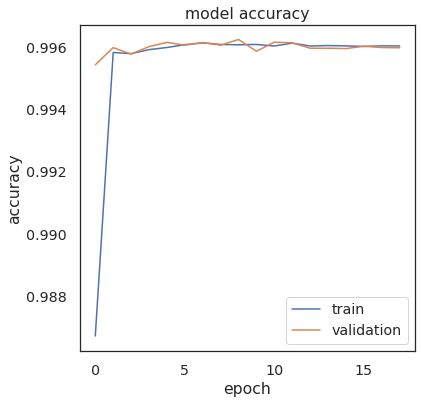

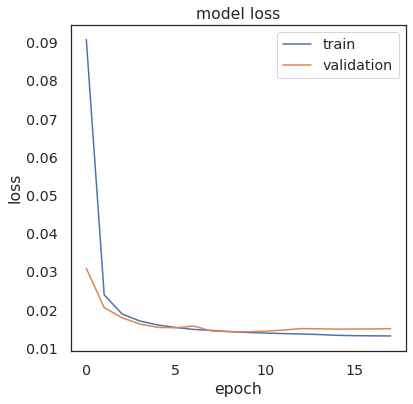

In [ ]:
plot_learning_curve(history)

#### Kết quả trên test set

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    203288
         1.0       0.99      0.99      0.99     65460

    accuracy                           1.00    268748
   macro avg       1.00      0.99      0.99    268748
weighted avg       1.00      1.00      1.00    268748

Confusion matrix:
[[202916    372]
 [   680  64780]]


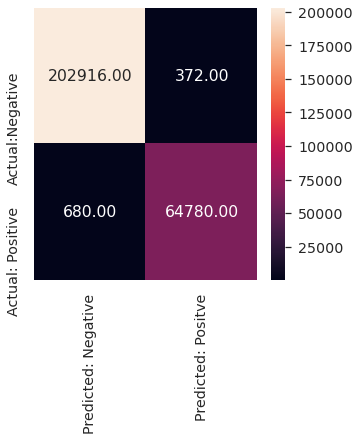

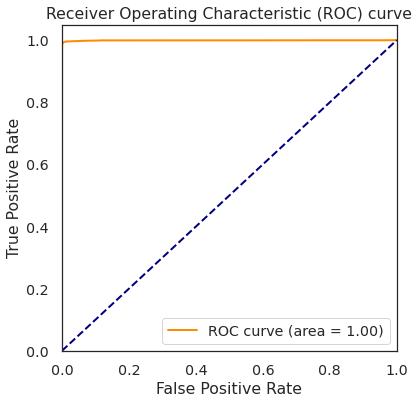

[False False False ... False False False]
1052 sample miss-classified.
Miss-classified samples:
{'normal.': 372, 'back.': 228, 'warezclient.': 195, 'ipsweep.': 40, 'nmap.': 57, 'satan.': 97, 'portsweep.': 14, 'smurf.': 8, 'neptune.': 15, 'rootkit.': 1, 'buffer_overflow.': 10, 'phf.': 2, 'land.': 7, 'warezmaster.': 1, 'imap.': 1, 'multihop.': 1, 'spy.': 1, 'guess_passwd.': 2}


In [ ]:
y_test_pred=logistic_model.predict(x_test)
evaluate(y_test, y_test_pred, labels_detail=y_test_detail)

### Decision Tree with sklearn

In [ ]:
x_train_val=np.concatenate([x_train, x_val], axis=0)
y_train_val=np.concatenate([y_train, y_val], axis=0)
test_fold = np.concatenate([
    # The training indices.
    np.full(x_train.shape[0],-1, dtype=np.int8),
    # The validation indices.
    np.zeros(x_val.shape[0], dtype=np.int8)
])
print(test_fold.shape)
ps=sklearn.model_selection.PredefinedSplit(test_fold)

(806244,)


Fitting 1 folds for each of 28 candidates, totalling 28 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done  24 out of  28 | elapsed:  4.2min remaining:   41.9s
[Parallel(n_jobs=4)]: Done  28 out of  28 | elapsed:  4.4min finished


Best parameter found:
{'criterion': 'gini', 'max_depth': 27, 'min_samples_leaf': 5}
Best score on validation set: 0.9996692487812945
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    203288
         1.0       1.00      1.00      1.00     65460

    accuracy                           1.00    268748
   macro avg       1.00      1.00      1.00    268748
weighted avg       1.00      1.00      1.00    268748

Confusion matrix:
[[203259     29]
 [    61  65399]]


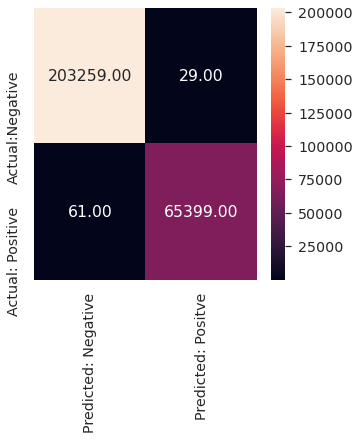

[False False False ... False False False]
90 sample miss-classified.
Miss-classified samples:
{'warezclient.': 16, 'normal.': 29, 'portsweep.': 5, 'satan.': 10, 'rootkit.': 1, 'buffer_overflow.': 7, 'pod.': 5, 'phf.': 2, 'land.': 3, 'guess_passwd.': 3, 'warezmaster.': 1, 'ipsweep.': 2, 'neptune.': 1, 'spy.': 1, 'imap.': 2, 'ftp_write.': 1, 'nmap.': 1}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
param_grid={'max_depth':[5, 11, 13, 17, 21, 27, 31],
    'criterion': ('gini', 'entropy'),
    'min_samples_leaf': (5, 10)
}

gs=GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid,cv=ps, n_jobs=4, verbose=10)
gs.fit(x_train_val, y_train_val)
best_dt=gs.best_estimator_
print('Best parameter found:',gs.best_params_,sep='\n')
print('Best score on validation set:',gs.best_score_)
y_test_pred=best_dt.predict(x_test)
evaluate(y_test, y_test_pred, roc=False, labels_detail=y_test_detail)

Sử dụng 3-fold cross validation cho kết qủa trên test set gần tương đồng

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   40.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  6.6min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  9.0min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 10.0min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 11.2min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed: 12.5min
[Parallel(n_jobs=4)]: Done  84 out of  84 | elapsed: 13.1min finished


Best parameter found:
{'criterion': 'entropy', 'max_depth': 21, 'min_samples_leaf': 5}
Best score on validation set: 0.9996427880393529
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    203288
         1.0       1.00      1.00      1.00     65460

    accuracy                           1.00    268748
   macro avg       1.00      1.00      1.00    268748
weighted avg       1.00      1.00      1.00    268748

Confusion matrix:
[[203259     29]
 [    53  65407]]


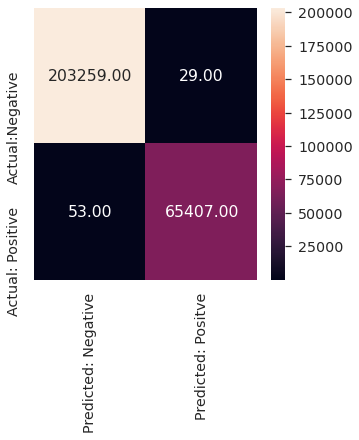

[False False False ... False False False]
82 sample miss-classified.
Miss-classified samples:
{'warezclient.': 13, 'satan.': 11, 'portsweep.': 4, 'normal.': 29, 'neptune.': 2, 'imap.': 2, 'rootkit.': 1, 'buffer_overflow.': 7, 'pod.': 5, 'nmap.': 1, 'guess_passwd.': 1, 'warezmaster.': 1, 'land.': 2, 'spy.': 1, 'ipsweep.': 1, 'ftp_write.': 1}


In [ ]:
gs=GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid,cv=3, n_jobs=4, verbose=10)
gs.fit(x_train_val, y_train_val)
best_dt=gs.best_estimator_
print('Best parameter found:',gs.best_params_,sep='\n')
print('Best score on validation set:',gs.best_score_)
y_test_pred=best_dt.predict(x_test)
evaluate(y_test, y_test_pred, roc=False, labels_detail=y_test_detail)

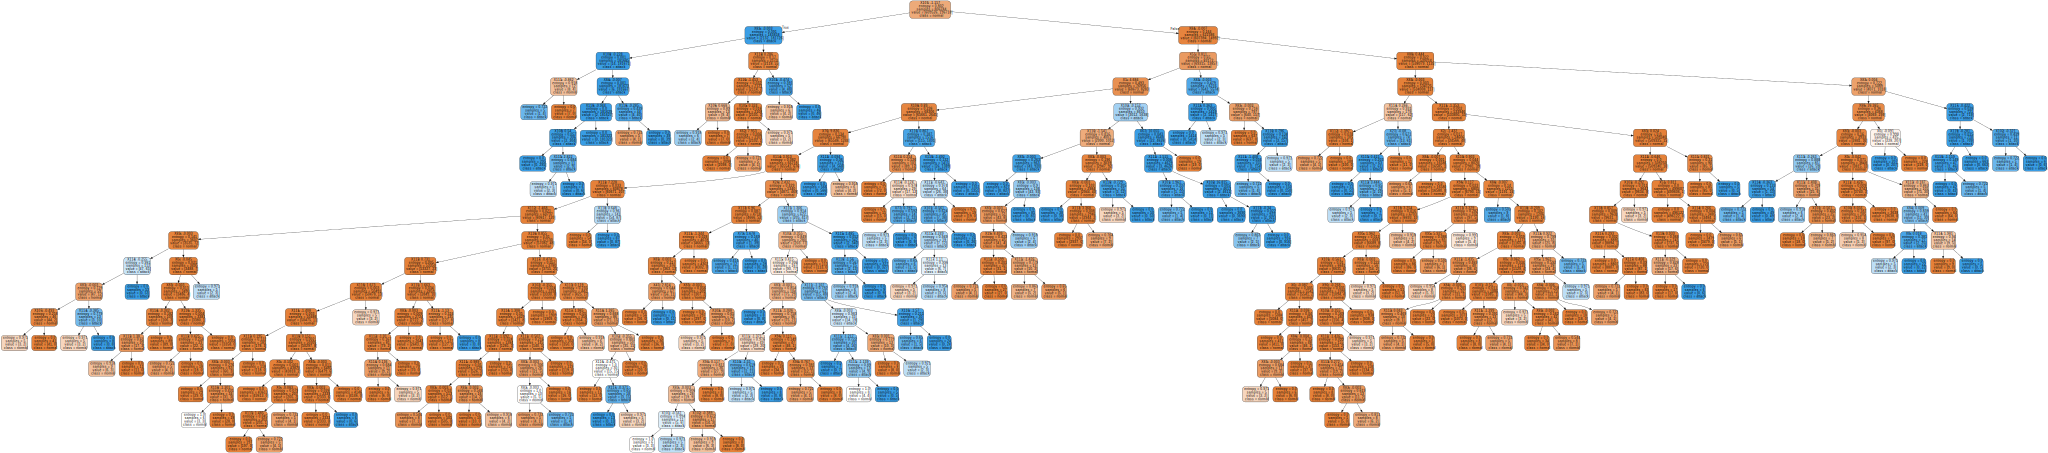

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(best_dt, out_file=None,
                                class_names=['normal', 'attack'],  filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

### Random Forest with sklearn

Fitting 1 folds for each of 42 candidates, totalling 42 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  6.1min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  8.6min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 11.1min
[Parallel(n_jobs=4)]: Done  40 out of  42 | elapsed: 13.5min remaining:   40.4s
[Parallel(n_jobs=4)]: Done  42 out of  42 | elapsed: 13.8min finished


Best parameter found:
{'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 5, 'n_estimators': 25}
Best score on validation set: 0.9996429390252611
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    203288
         1.0       1.00      1.00      1.00     65460

    accuracy                           1.00    268748
   macro avg       1.00      1.00      1.00    268748
weighted avg       1.00      1.00      1.00    268748

Confusion matrix:
[[203277     11]
 [    85  65375]]


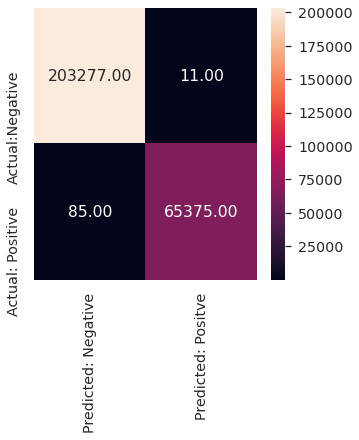

[False False False ... False False False]
96 sample miss-classified.
Miss-classified samples:
{'warezclient.': 37, 'satan.': 15, 'back.': 1, 'nmap.': 3, 'portsweep.': 6, 'normal.': 11, 'imap.': 2, 'rootkit.': 1, 'buffer_overflow.': 9, 'phf.': 2, 'guess_passwd.': 3, 'warezmaster.': 1, 'spy.': 1, 'ipsweep.': 2, 'land.': 1, 'ftp_write.': 1}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid={'n_estimators':[9,25,55],
            'max_depth':[5, 11, 13, 17, 21, 27, 31],
            'criterion': ('gini', 'entropy'),
             'min_samples_leaf': (5,)}
gs=GridSearchCV(estimator=RandomForestClassifier(n_jobs=2,random_state=42),param_grid=param_grid,cv=ps,n_jobs=4,verbose=10)
gs.fit(x_train_val, y_train_val)
best_rf=gs.best_estimator_
print('Best parameter found:',gs.best_params_,sep='\n')
print('Best score on validation set:',gs.best_score_)
y_test_pred=best_rf.predict(x_test)
evaluate(y_test, y_test_pred, roc=False, labels_detail=y_test_detail)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   57.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  4.9min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  7.1min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 11.3min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 14.7min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 19.9min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 24.0min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed: 27.9min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed: 32.4min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed: 37.1min
[Parallel(n_jobs=4)]: Done 126 out of 126 | elapsed: 44.6min finished


Best parameter found:
{'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 5, 'n_estimators': 55}
Best score on validation set: 0.999635346123506
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    203288
         1.0       1.00      1.00      1.00     65460

    accuracy                           1.00    268748
   macro avg       1.00      1.00      1.00    268748
weighted avg       1.00      1.00      1.00    268748

Confusion matrix:
[[203274     14]
 [    67  65393]]


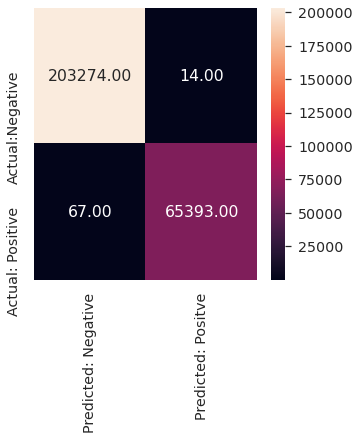

[False False False ... False False False]
81 sample miss-classified.
Miss-classified samples:
{'satan.': 15, 'back.': 2, 'nmap.': 4, 'warezclient.': 22, 'portsweep.': 4, 'normal.': 14, 'imap.': 2, 'rootkit.': 1, 'buffer_overflow.': 9, 'phf.': 2, 'guess_passwd.': 2, 'warezmaster.': 1, 'spy.': 1, 'ipsweep.': 1, 'ftp_write.': 1}


In [ ]:
gs=GridSearchCV(estimator=RandomForestClassifier(n_jobs=2,random_state=42),param_grid=param_grid,cv=3,n_jobs=4,verbose=10)
gs.fit(x_train_val, y_train_val)
best_rf=gs.best_estimator_
print('Best parameter found:',gs.best_params_,sep='\n')
print('Best score on validation set:',gs.best_score_)
y_test_pred=best_rf.predict(x_test)
evaluate(y_test, y_test_pred, roc=False, labels_detail=y_test_detail)

### SVM with sklearn

Fitting 1 folds for each of 12 candidates, totalling 12 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:  8.0min
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed: 26.9min
[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed: 42.0min finished


Best parameter found:
{'C': 0.3, 'loss': 'hinge'}
Best score on validation set: 0.9962752902529871
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    203288
         1.0       0.99      0.99      0.99     65460

    accuracy                           1.00    268748
   macro avg       1.00      0.99      1.00    268748
weighted avg       1.00      1.00      1.00    268748

Confusion matrix:
[[202854    434]
 [   517  64943]]


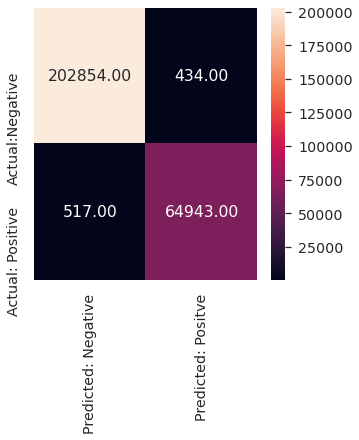

[False False False ... False False False]
951 sample miss-classified.
Miss-classified samples:
{'normal.': 434, 'back.': 213, 'warezclient.': 139, 'portsweep.': 6, 'satan.': 95, 'smurf.': 9, 'neptune.': 22, 'nmap.': 11, 'rootkit.': 1, 'ipsweep.': 10, 'buffer_overflow.': 3, 'phf.': 2, 'warezmaster.': 1, 'imap.': 1, 'multihop.': 1, 'spy.': 1, 'guess_passwd.': 2}


In [ ]:
from sklearn.svm import LinearSVC
param_grid={'C':[0.03, 0.1, 0.3, 1, 3, 10],
            'loss': ['hinge', 'squared_hinge']
            }

gs=GridSearchCV(estimator=sklearn.svm.LinearSVC(random_state=42, max_iter=1000, fit_intercept=True), 
                param_grid=param_grid,cv=ps, n_jobs= 2 ,verbose=10)
gs.fit(x_train_val,y_train_val)

best_svm=gs.best_estimator_
print('Best parameter found:',gs.best_params_,sep='\n')
print('Best score on validation set:',gs.best_score_)
y_test_pred=best_svm.predict(x_test)
evaluate(y_test, y_test_pred, roc=False, labels_detail=y_test_detail)

### Naive Bayes

Classification report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97    203288
         1.0       0.99      0.85      0.91     65460

    accuracy                           0.96    268748
   macro avg       0.97      0.92      0.94    268748
weighted avg       0.96      0.96      0.96    268748

Confusion matrix:
[[202699    589]
 [  9818  55642]]


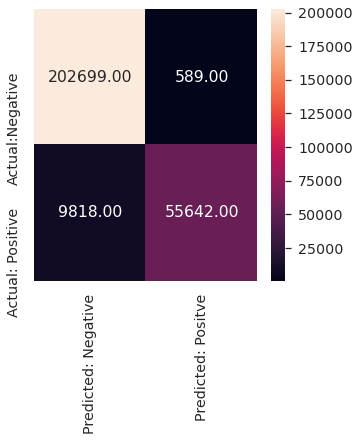

[False False False ... False False False]
10407 sample miss-classified.
Miss-classified samples:
{'satan.': 730, 'normal.': 589, 'neptune.': 7354, 'back.': 223, 'ipsweep.': 827, 'warezclient.': 207, 'portsweep.': 170, 'nmap.': 288, 'rootkit.': 1, 'buffer_overflow.': 11, 'phf.': 2, 'warezmaster.': 1, 'multihop.': 1, 'spy.': 1, 'guess_passwd.': 2}


In [ ]:
nb_clf=GaussianNB()
nb_clf.fit(x_train_val, y_train_val)
y_test_pred=nb_clf.predict(x_test)
evaluate(y_test, y_test_pred, roc=False, labels_detail=y_test_detail)